In [1]:
import pickle
import pandas as pd
with open('tickers_list.pkl', 'rb') as f:
    tickers_list = pickle.load(f)
print(len(tickers_list))
close_data = pd.read_csv('close_data.csv', index_col=0, parse_dates=True)
open_data = pd.read_csv('open_data.csv', index_col=0, parse_dates=True)

3983


In [1]:
import pickle
with open('close_data_by_year.pkl', 'rb') as f:
    close_data_by_year = pickle.load(f)
with open('open_data_by_year.pkl', 'rb') as f:
    open_data_by_year = pickle.load(f)

In [2]:
import pandas as pd
# Define the start and end dates of the entire period
start_date = '2000-01-01'
end_date = '2023-08-02'

# Generate a list of semester start and end dates
semester_dates = []
current_date = pd.Timestamp(start_date)
while current_date < pd.Timestamp(end_date):
    semester_dates.append(current_date.normalize())
    if current_date.month == 1:
        current_date += pd.DateOffset(months=6)
    else:
        current_date += pd.DateOffset(months=6)
semester_dates

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2000-07-01 00:00:00'),
 Timestamp('2001-01-01 00:00:00'),
 Timestamp('2001-07-01 00:00:00'),
 Timestamp('2002-01-01 00:00:00'),
 Timestamp('2002-07-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2005-01-01 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-07-01 00:00:00'),
 Timestamp('2007-01-01 00:00:00'),
 Timestamp('2007-07-01 00:00:00'),
 Timestamp('2008-01-01 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2010-01-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2014-01-

In [3]:
# Initialize an empty dictionary to store the semester DataFrames
semester_dataframes = {}

# Loop through the semester start dates
for i in range(len(semester_dates) - 1):
    # Get the start and end dates for the current semester
    semester_start = semester_dates[i]
    semester_end = semester_dates[i + 1]
    
    # Slice the original DataFrame for the current semester
    semester_df = open_data[(open_data.index >= semester_start) & (open_data.index < semester_end)]
    
    # Store the semester DataFrame in the dictionary
    semester_dataframes[f'Semester_{i + 1}'] = semester_df

# Include the last semester separately (from the last semester_end to end_date)
semester_df = open_data[(open_data.index >= semester_dates[-1]) & (open_data.index <= end_date)]
semester_dataframes[f'Semester_{len(semester_dates)}'] = semester_df

# Print the number of rows in each semester for verification
for semester, df in semester_dataframes.items():
    print(f"{semester}: {len(df)} rows")

# Access individual semester DataFrames using semester_dataframes['Semester_1'], etc.

Semester_1: 126 rows
Semester_2: 126 rows
Semester_3: 125 rows
Semester_4: 123 rows
Semester_5: 124 rows
Semester_6: 128 rows
Semester_7: 124 rows
Semester_8: 128 rows
Semester_9: 124 rows
Semester_10: 128 rows
Semester_11: 125 rows
Semester_12: 127 rows
Semester_13: 125 rows
Semester_14: 126 rows
Semester_15: 124 rows
Semester_16: 127 rows
Semester_17: 125 rows
Semester_18: 128 rows
Semester_19: 124 rows
Semester_20: 128 rows
Semester_21: 124 rows
Semester_22: 128 rows
Semester_23: 125 rows
Semester_24: 127 rows
Semester_25: 125 rows
Semester_26: 125 rows
Semester_27: 124 rows
Semester_28: 128 rows
Semester_29: 124 rows
Semester_30: 128 rows
Semester_31: 124 rows
Semester_32: 128 rows
Semester_33: 125 rows
Semester_34: 127 rows
Semester_35: 125 rows
Semester_36: 126 rows
Semester_37: 125 rows
Semester_38: 126 rows
Semester_39: 124 rows
Semester_40: 128 rows
Semester_41: 125 rows
Semester_42: 128 rows
Semester_43: 124 rows
Semester_44: 128 rows
Semester_45: 124 rows
Semester_46: 127 ro

In [5]:
for semester_name, semester_df in semester_dataframes.items():
    valid_columns = semester_df.columns[~semester_df.isna().any()]
    semester_dataframes[semester_name] = semester_df[valid_columns]

In [17]:
# Create a new dictionary with updated keys
open_bysemester = {}
for key in semester_dataframes.keys():
    new_key = key.replace('Semester_', 'Semester_')
    open_bysemester[new_key] = semester_dataframes[key]

In [80]:
# Replace 'ARWR' with the column name you want to remove
column_to_remove = 'ARWR'

for semester_key, semester_df in open_bysemester.items():
    open_bysemester[semester_key] = semester_df.drop(columns=[column_to_remove])

In [79]:
open_bysemester['Semester_48']

,A,AA,AAC,AACT,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZTO,ZTS,ZUMZ,ZUO,ZURA,ZVIA,ZVRA,ZWS,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-03,120.019997,34.500000,10.56,10.160,17.860001,14.02,6.255,94.320000,70.230003,193.779999,...,25.490000,170.529999,16.740000,10.98,8.25,4.32,5.09,26.639999,8.64,9.51
2023-07-05,118.949997,33.910000,10.56,10.150,17.980000,14.35,6.050,95.379997,70.940002,191.570007,...,24.900000,169.199997,17.090000,11.00,7.98,4.50,5.02,26.549999,8.64,9.50
2023-07-06,116.360001,33.029999,10.57,10.160,18.020000,13.94,6.890,92.870003,70.339996,189.839996,...,24.629999,167.630005,16.340000,9.89,7.27,4.06,4.96,26.059999,8.47,9.02
2023-07-07,117.669998,32.799999,10.57,10.170,17.930000,14.60,6.590,94.459999,69.800003,191.410004,...,24.920000,168.229996,16.799999,10.15,7.12,3.95,4.75,25.860001,8.14,9.03
2023-07-10,116.730003,33.700001,10.56,10.150,18.320000,14.53,7.400,94.620003,67.150002,189.259995,...,24.760000,166.789993,17.370001,10.27,6.91,4.06,4.85,26.049999,8.25,9.00
2023-07-11,118.300003,33.599998,10.55,10.150,18.639999,13.99,8.615,95.110001,69.160004,189.160004,...,25.219999,170.539993,17.450001,10.72,7.00,4.17,4.98,27.020000,8.19,9.08
2023-07-12,120.000000,35.810001,10.56,10.160,18.930000,14.55,10.320,96.300003,71.260002,189.679993,...,26.750000,171.949997,18.059999,11.18,6.92,4.10,4.90,27.480000,8.11,9.10
2023-07-13,120.760002,35.700001,10.58,10.160,19.049999,14.48,9.500,97.510002,70.650002,190.500000,...,26.900000,172.410004,17.910000,10.75,6.36,4.22,4.78,27.450001,8.36,9.17
2023-07-14,119.540001,35.500000,10.58,10.170,18.440001,14.85,10.900,97.599998,70.589996,190.229996,...,27.360001,171.660004,17.420000,11.03,6.92,4.34,4.84,27.209999,8.30,9.29


In [81]:
import pickle
with open('open_bysemester.pkl', 'wb') as f:
    pickle.dump(open_bysemester, f)

In [1]:
import pickle
with open('open_bysemester.pkl', 'rb') as f:
    open_bysemester = pickle.load(f)

In [6]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [5]:
font_path = 'C:\\Users\\rauup\\AppData\\Local\\Microsoft\\Windows\\Fonts\\RomanSerif.ttf'
plt.rcParams['font.family'] = plt.FontProperties(fname=font_path).get_name()

AttributeError: module 'matplotlib.pyplot' has no attribute 'FontProperties'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from itertools import combinations, chain
import warnings
from sklearn.manifold import TSNE

class OpticsPairs:
    """
    This class implements the pairs selection framework outlined in
    Simao Moraes Saremtno and Nuno Horta's publication:
    Enhancing a Pairs Trading strategy with the application
    of Machine Learning [1].
    <http://premio-vidigal.inesc.pt/pdf/SimaoSarmentoMSc-resumo.pdf>`_

    Their work is motivated by the need to find "profitable pairs while
    constraining the search space" [1]. To achieve this, security returns
    are first reduced via principal component analysis. Next the securities are
    paired through clustering via the OPTICS algorithim introduced by
    Ankerst et. al in their publication: OPTICS: Ordering Points To Identify
    the Clustering Structure [2]
    <https://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf>`_
    Finally, the pairs are filtered by criteria including: the Engle-Granger
    test, analysis of the Hurst exponent, half-life filtering, and practical
    implementation requirements.
    """

    def __init__(self, data: pd.DataFrame):
        """
        Initializes OpticsPairs object and calculates one-period returns of
        securities.

        :param data: pd.DataFrame containing time series returns of various
            assets. Dimensions of dataframe should be TxN.
        """

        self.prices = data
        self.securities = self.prices.columns
        self.returns = self.prices.pct_change()[1:]
        self.returns_reduced = None  # Reduced transform of returns from PCA
        self.components_ = None  # Components generated from PCA
        self.n_components_ = None  # Number of components of PCA
        self.explained_variance_ratio_ = None  # Vairance explained by PCA
        self.pairs = None  # Potential pairs found from OPTICS clusters
        self.engle_granger_tests = None  # pvalue Engle-Granger cointegration
        self.fixed_betas = None  # Fixed Beta values from Engle-Granger cointegration
        self.pair_variables = None  # Optimal Independent/Dependent Variable List
        self.norm_spreads = None  # Z-score of spreads generated from pairs
        self.hurst_exponents = None  # Hurst exponent  from normalized spreads
        self.half_lives = None  # Half-life of normalized spreads
        self.avg_cross_count = None  # Ann average count of spread crosses mean
        self.pairs_df = None  # Dataframeof summary stats and potential pairs
        self.filtered_pairs = None  # Filtered pairs_df
        self.cluster_labels = None  # Array of cluster labels for securities

    def reduce_PCA(self,
                   n_components_: int = 5,
                   Scaler=StandardScaler(),
                   random_state: int = 42):
        """
        Reduces self.returns to dimensions equal to n_components_ through
        principal component analysis. Returns are first scaled via the Scaler
        parameter. Then calculate correlation matrix of scaled returns.
        Finally, principal component analysis is used to reduce dimensions.

        :param n_components_: An integer to denote number of dimensions
            for pca. Authors recommend n_components_ <= 15 [1].
        :param Scaler: A transformer to scale input data. Scaled data is
            recommended for principal component analysis.
        :param random_state: An integer to denote the seed for PCA() to insure
            reproducibility.
        """

        if self.returns is None:
            raise ValueError("returns not found: input price dataframe into OpticsPairs instance")

        if n_components_ > 15:
            warnings.warn("Maximum n_components_ recommended is 15")

            # PCA pipeline
        pipe = Pipeline([
            ('scaler', Scaler),
            ('pca', PCA(n_components=n_components_, random_state=random_state))
        ])

        self.returns_reduced = pipe.fit_transform(self.returns)
        self.components_ = pipe['pca'].components_
        self.n_components_ = pipe['pca'].n_components_
        self.explained_variance_ratio_ = pipe['pca'].explained_variance_ratio_

    def find_pairs(self):
        """
        Uses OPTICS algorithim to find clusters of similar securities within
        PCA component space. Once clusters labels are assigned, function
        generates series of tuples containing unique pairs of securities
        within the same cluster.
        """

        if self.returns_reduced is None:
            raise ValueError("returns_reduced not found: must run \
                             .reduce_PCA() before this function")

        # Initialize and fit OPTICS cluster to PCA components
        clustering = OPTICS()
        clustering.fit(self.components_.T)

        # Create cluster data frame and identify trading pairs
        clusters = pd.DataFrame({'security': self.securities,
                                 'cluster': clustering.labels_})
        # Clusters with label == -1 are 'noise'
        # From OPTICS sk-learn documentation: Noisy samples and points
        # which are not included in a leaf cluster of cluster_hierarchy_
        # are labeled as -1
        clusters = clusters[clusters['cluster'] != -1]

        # Group securities by cluster and flatten list of combination lists
        groups = clusters.groupby('cluster')
        combos = list(groups['security'].apply(combinations, 2))  # All pairs
        pairs = list(chain.from_iterable(combos))  # Flatten list of lists

        print(f"Found {len(pairs)} potential pairs")

        self.pairs = pd.Series(pairs)
        self.cluster_labels = clustering.labels_

    def calc_updated_norm_spread(self, pair):
        security_0 = pair[0]
        security_1 = pair[1]

        # Create a design matrix using both securities
        design_matrix = np.column_stack((security_0, security_1))

        # Perform Total Least Squares (TLS)
        # Calculate the covariance matrix of the design matrix
        cov_matrix = np.cov(design_matrix, rowvar=False)

        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov_matrix)

        # Get the eigenvector corresponding to the smallest eigenvalue
        min_eigvec = eigvecs[:, np.argmin(eigvals)]

        # Calculate the orthogonal distance between each data point and the regression line
        distances = np.dot(design_matrix - np.mean(design_matrix, axis=0), min_eigvec)

        # Calculate the norm spread using the calculated distances
        norm_spread = OpticsPairs.calc_zscore(distances)

        return norm_spread

    def calc_eg_norm_spreads(self):
        """
        Calculates the p-value of the t-stat from the Engle-Granger
        cointegration test. Calculates normalized beta-adjusted spread
        series of potential pairs.
        """

        if self.prices is None:
            raise ValueError("prices not found: must initialize with \
                             price dataframe before this function")

        if self.pairs is None:
            raise ValueError("pairs not found: must run .find_pairs() \
                             before this function")

        engle_granger_tests = []
        pair_variables = []
        fixed_betas = []
        norm_spreads = []

        # Test each pair for cointegration
        for pair in self.pairs:

            security_0 = self.prices[pair[0]]
            security_1 = self.prices[pair[1]]

            # Get independent and dependent variables
            # for OLS calculation and corresponding
            # pvalue for Engle-Granger tests
            pvalue, x, y = OpticsPairs.get_ols_variables(
                security_0, security_1)
            engle_granger_tests.append(pvalue)
            
            # xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
            pvalue_0, x_0, y_0 = OpticsPairs.get_ols_variables(security_0, security_1)
            pvalue_1, x_1, y_1 = OpticsPairs.get_ols_variables(security_1, security_0)

            if abs(pvalue_0) < abs(pvalue_1):  # Compare p-values (or t-statistics)
                x = x_0
                y = y_0
            else:
                x = x_1
                y = y_1
                pair = (pair[1], pair[0]) 
            # xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

            if(np.array_equal(y, np.asarray(security_0))):
                pair_variables.append(dict({'y': pair[0], 'x': pair[1]}))
            else:
                pair_variables.append(dict({'y': pair[1], 'x': pair[0]}))

            # Get parameters and calculate spread
            model = sm.OLS(y, x)
            result = model.fit()
            alpha, beta = result.params[0], result.params[1]

            fixed_betas.append(beta)

            spread = y - (alpha + beta*x.T[1])
            norm_spread = OpticsPairs.calc_zscore(spread)
            norm_spreads.append(norm_spread)

        # Convert spreads from list to dataframe
        norm_spreads = pd.DataFrame(np.transpose(norm_spreads),
                                    index=self.prices.index)

        self.norm_spreads = norm_spreads
        self.fixed_betas = pd.Series(fixed_betas)
        self.engle_granger_tests = pd.Series(engle_granger_tests)
        self.pair_variables = pair_variables

    @staticmethod
    def get_ols_variables(security_0: str,
                          security_1: str):
        """
        Compares t-stats of two Engle-Granger cointegration tests.
        Returns independent and dependent variables for OLS.

        :params security_0: String identifier of first security.
        :params security_1: String identifier of second security.
        """

        test_0 = ts.coint(security_0, security_1)
        test_1 = ts.coint(security_1, security_0)

        t_stat_0, pvalue_0 = test_0[0], test_0[1]
        t_stat_1, pvalue_1 = test_1[0], test_1[1]

        # Avoid reliance on dependent variable and choose smallest t-stat
        # for Engle-Granger Test
        # Use corresponding independent and dependent variables to
        # calculate spread
        if abs(t_stat_0) < abs(t_stat_1):
            pvalue = pvalue_0
            x = sm.add_constant(np.asarray(security_1))
            y = np.asarray(security_0)
        else:
            pvalue = pvalue_1
            x = sm.add_constant(np.asarray(security_0))
            y = np.asarray(security_1)

        return pvalue, x, y

    def calc_hurst_exponents(self):
        """
        Calculates Hurst exponent of each potential pair's normalized spread.
        """

        if self.norm_spreads is None:
            raise ValueError("norm_spreads not found: must run \
                            .calc_eg_norm_spreads before this function")

        hurst_exponents = []

        # Calculate Hurst exponents and generate series
        for col in self.norm_spreads.columns:
            hurst_exp = OpticsPairs.hurst(self.norm_spreads[col].values)
            hurst_exponents.append(hurst_exp)

        self.hurst_exponents = pd.Series(hurst_exponents)

    def calc_half_lives(self):
        """
        Calculates half-life of each potential pair's normalized spread.
        """
        if self.norm_spreads is None:
            raise ValueError("norm_spreads not found: must run \
                            .calc_eg_norm_spreads before this function")

        self.half_lives = self.norm_spreads.apply(OpticsPairs.half_life)

    def calc_avg_cross_count(self, trading_year: float = 252.0):
        """
        Calculates the average number of instances per year the
        normalized spread of potential pairs crosses the mean.
        Authors recommend trading pairs that cross mean on average
        12 times per year [1].
        """

        if self.prices is None:
            raise ValueError("prices not found: must initialize with \
                                price dataframe before this function")

        if self.norm_spreads is None:
            raise ValueError("norm_spreads not found: must run \
                            .calc_eg_norm_spreads() before this function")

        # Find number of years
        n_days = len(self.prices)
        n_years = n_days/trading_year

        # Find annual average cross count
        cross_count = self.norm_spreads.apply(OpticsPairs.count_crosses)
        self.avg_cross_count = cross_count/n_years

    def filter_pairs(self,
                     max_pvalue: float = 0.05,
                     max_hurst_exp: float = 0.5,
                     max_half_life: float = 252.0,
                     min_half_life: float = 1.0,
                     min_avg_cross: float = 12.0):
        """
        Generates a summary dataframe of potential pairs containing:
            1. Engle-Granger p-value
            2. Hurst exponent
            3. Half-life
            4. Average Cross Count
        Filters summary dataframe to include pairs that meet user
        specified criteria.

        :param max_pvalue: A floating number to eliminate potential pairs with
            Engle-Granger t-stat pvalues above max_pvalue. Default set to 5%.
        :param max_hurst_exp: A floating number to eliminate potential
            pairs with Hurst exponents greater than max_hurst_exp.
            Values below 0.5 represent mean-reverting pairs.
            Default set to 0.5.
        :param max_half_life: A floating number to eliminate potential pairs
            with half-lives above user defined value.
            Default value set to 252.0.
        :param min_half_life: A floating number to eliminate potential
            pairs with half-lives below user defined value.
            Default value set to 1.0.
        :min_avg_cross: A floating number to eliminate potential pairs with
            average cross count less than user defined value.
            Default value set to 12.0
        """

        required = [self.prices,
                    self.engle_granger_tests,
                    self.hurst_exponents,
                    self.half_lives,
                    self.avg_cross_count,
                    self.fixed_betas,
                    self.pair_variables]

        for i in required:
            if i is None:
                raise ValueError(
                    "Required: \n 1. prices \n 2. engle_granger_tests \n 3. hurst_exponents \n 4. half_lives \n 5. avg_cross_count \n 6. fixed_betas \n 7. pair_variables")

        # Generate summary dataframe of potential trading pairs
        pairs_df = pd.concat([self.pairs,
                              self.engle_granger_tests,
                              self.hurst_exponents,
                              self.half_lives,
                              self.avg_cross_count, self.fixed_betas],
                             axis=1)
        pairs_df.columns = ['pair',
                            'pvalue',
                            'hurst_exp',
                            'half_life',
                            'avg_cross_count',
                            'beta']

        # Find pairs that meet user defined criteria
        filtered_pairs = pairs_df.loc[
            # Significant Engle-Grange test AND
            (pairs_df['pvalue'] <= max_pvalue) &
            # Mean reverting according to Hurst exponent AND
            (pairs_df['hurst_exp'] < max_hurst_exp) &
            # Half-life above minimum value AND
            # Half-life below maximum value AND
            ((pairs_df['half_life'] >= min_half_life) &
             (pairs_df['half_life'] <= max_half_life)) &
            # Produces sufficient number of trading opportunities
            (pairs_df['avg_cross_count'] >= min_avg_cross)]

        self.pairs_df = pairs_df
        self.filtered_pairs = filtered_pairs

        if len(self.filtered_pairs) == 0:
            print("No tradable pairs found. Try relaxing criteria.")
        else:
            n_pairs = len(self.filtered_pairs)
            print(f"Found {n_pairs} tradable pairs!")

    def plot_pair_price_spread(self, idx: int):
        """
        Plots the price path of both securities in selected pair,
        with dual axis. Plots the normalized spread of the price paths.
        """
        required = [self.prices,
                    self.pairs,
                    self.norm_spreads,
                    self.half_lives,
                    self.avg_cross_count]

        for i in required:
            if i is None:
                raise ValueError("Required: \n 1. prices \n 2. pairs \
                                \n 3. norm_spreads")

        fontsize = 20
        securities = self.pairs[idx]

        fig, axs = plt.subplots(2, 1, sharex=True, figsize=(20, 10))

        # first security (left axis)
        security = securities[0]
        color = 'tab:blue'
        axs[0].plot(self.prices[security], color=color)
        axs[0].set_ylabel(security, color=color, fontsize=fontsize)
        axs[0].tick_params(axis='y', labelcolor=color)
        axs[0].set_title('pair_'+str(idx)+' prices', fontsize=fontsize)

        # second security (right axis)
        security = securities[1]
        color = 'tab:orange'
        axs2 = axs[0].twinx()
        axs2.plot(self.prices[security], color=color)
        axs2.set_ylabel(security, color=color, fontsize=fontsize)
        axs2.tick_params(axis='y', labelcolor=color)

        # plot spread
        axs[1].plot(self.norm_spreads[idx], color='black')
        axs[1].set_ylabel('spread_z_score', fontsize=fontsize, color="w")
        axs[1].set_xlabel('date', fontsize=fontsize, color="w")
        axs[1].set_title('pair_'+str(idx)+' normalized spread',
                         fontsize=fontsize, color="w")
        axs[1].axhline(0, color='blue', ls='--')
        axs[1].axhline(1, color='r', ls='--')
        axs[1].axhline(-1, color='r', ls='--')

        fig.tight_layout()

    def plot_explained_variance(self):
        """
        Plots the cumulative variance explained by principal component
        analysis.
        """

        if self.explained_variance_ratio_ is None:
            raise ValueError("explained_variance_ratio_ missing: run \
                            .reduce_PCA() before this function")

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(
            np.cumsum(self.explained_variance_ratio_),
            linewidth=2,
            linestyle="-",
            color="blue",
        )
        ax.set_title(
            "Cumulative explained variance by 5 PCs in semester 30",  fontproperties=custom_font,
            fontsize=16,
        )
        ax.set_xlabel("Number of components", fontproperties=custom_font, fontsize=16)
        ax.set_ylabel("Explained variance", fontproperties=custom_font, fontsize=16)
        ax.grid(True)
        legend_font = FontProperties(fname=r'C:\Users\rauup\AppData\Local\Microsoft\Windows\Fonts\cmu.serif-roman.ttf')
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(legend_font)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(legend_font)

        plt.savefig('plot_explained_variance.png', dpi=dpi, bbox_inches='tight')
        fig.tight_layout()


    def plot_loadings(self, n: int = 5):
        """
        Plots up to 5 bar charts depicting the loadings of
        each component, by security.
        """

        if self.components_ is None:
            raise ValueError("components_ missing: run \
                            .reduce_PCA() before this function")

        n_loadings = min(n, self.n_components_)
        fig, axs = plt.subplots(n_loadings, 1, sharex=True, figsize=(20, 20))
        fontsize = 10
        for i in range(n_loadings):
            axs[i].bar([i for i in range(self.components_.shape[1])],
                       self.components_[i])
            axs[i].set_ylabel('component_'+str(i)+' loading',
                              fontsize=fontsize)
        axs[0].set_title('PCA Loadings', fontsize=fontsize)
        axs[i].set_xlabel('security_observation', fontsize=fontsize)

        fig.tight_layout()

    def plot_clusters(self, n_dimensions: int = 3):
        """
        Plots a 2-dimension or 3-dimension scatter plot of security principal
        component loadings. Plots either the first two or three
        principal components and colors securities according to their
        cluster label found from OPTICS algorithm.

        :param n_dimensions: An integer to denote how many dimensions to plot.
            Default value is two.
        """

        for i in [self.n_components_, self.components_, self.cluster_labels]:
            if i is None:
                raise ValueError("Required: \n 1. n_components \n 2. \
                                reduced_returns")


        figsize = (10, 6)

        if n_dimensions == 2:
            fig, axs = plt.subplots(1, 1, figsize=figsize)
            axs.scatter(self.components_[0].T[self.cluster_labels != -1],
                        self.components_[1].T[self.cluster_labels != -1],
                        c=self.cluster_labels[self.cluster_labels != -1])
            axs.scatter(self.components_[0].T[self.cluster_labels == -1],
                        self.components_[1].T[self.cluster_labels == -1],
                        c=self.cluster_labels[self.cluster_labels == -1],
                        alpha=0.1)
            axs.set_title('OPTICS Clusters', fontsize=fontsize)
            axs.set_xlabel('component_0 loading', fontsize=fontsize)
            axs.set_ylabel('component_1 loading', fontsize=fontsize)
            fig.tight_layout()

        elif n_dimensions == 3:
            fig = plt.figure(figsize=figsize)
            axs = fig.add_subplot(111, projection='3d')
            axs.scatter(self.components_[0].T[self.cluster_labels != -1],
                        self.components_[1].T[self.cluster_labels != -1],
                        self.components_[2].T[self.cluster_labels != -1],
                        c=self.cluster_labels[self.cluster_labels != -1])
            axs.scatter(self.components_[0].T[self.cluster_labels == -1],
                        self.components_[1].T[self.cluster_labels == -1],
                        self.components_[2].T[self.cluster_labels == -1],
                        c=self.cluster_labels[self.cluster_labels == -1],
                        alpha=0.1)


            axs.set_title('OPTICS Clusters', fontsize=10)
            axs.set_xlabel('component_0 loading', fontsize=10)
            axs.set_ylabel('component_1 loading', fontsize=10)
            axs.set_zlabel('component_2 loading', fontsize=10)            
            plt.savefig('fig.png', dpi=dpi, bbox_inches='tight')
            fig.tight_layout()

        else:
            warnings.warn("Cannot visualize more than three dimensions!")
            
    def plot_clusters_tsne(self):
        """
        Plots a 2-dimension scatter plot of t-SNE embeddings of your data
        colored by cluster labels found from OPTICS algorithm.
        """

        for i in [self.n_components_, self.components_, self.cluster_labels]:
            if i is None:
                raise ValueError("Required: \n 1. n_components \n 2. reduced_returns")

        # Compute t-SNE embeddings
        tsne = TSNE(n_components=3)  # You can change n_components as needed
        tsne_embeddings = tsne.fit_transform(self.components_.T)

        figsize = (10, 6)
        fontsize=12


        fig, axs = plt.subplots(1, 1, figsize=figsize)
        axs.scatter(tsne_embeddings[:, 0][self.cluster_labels != -1],
                    tsne_embeddings[:, 1][self.cluster_labels != -1],
                    c=self.cluster_labels[self.cluster_labels != -1])
        axs.scatter(tsne_embeddings[:, 0][self.cluster_labels == -1],
                    tsne_embeddings[:, 1][self.cluster_labels == -1],
                    c=self.cluster_labels[self.cluster_labels == -1],
                    alpha=0.1)
        axs.set_title('t-SNE Clusters', fontproperties=custom_font, fontsize=16)
        axs.set_xlabel('t-SNE Dimension 1', fontproperties=custom_font, fontsize=16)
        axs.set_ylabel('t-SNE Dimension 2', fontproperties=custom_font, fontsize=16)
        legend_font = FontProperties(fname=r'C:\Users\rauup\AppData\Local\Microsoft\Windows\Fonts\cmu.serif-roman.ttf')
        for tick in axs.get_xticklabels():
            tick.set_fontproperties(legend_font)
        for tick in axs.get_yticklabels():
            tick.set_fontproperties(legend_font)
        plt.savefig('tsne.png', dpi=dpi, bbox_inches='tight')
        fig.tight_layout()

    @staticmethod
    def hurst(norm_spread):
        """
        Calculates Hurst exponent.
        https://en.wikipedia.org/wiki/Hurst_exponent

        :param norm_spread: An array like object used to calculate half-life.
        """
        # Create the range of lag values
        lags = range(2, 100)

        # Calculate the array of the variances of the lagged differences
        diffs = [np.subtract(norm_spread[l:], norm_spread[:-l]) for l in lags]
        tau = [np.sqrt(np.std(diff)) for diff in diffs]

        # Use a linear fit to estimate the Hurst Exponent
        poly = np.polyfit(np.log(lags), np.log(tau), 1)

        # Return the Hurst exponent from the polyfit output
        H = poly[0]*2.0

        return H

    @staticmethod
    def half_life(norm_spread):
        """
        Calculates time series half-life.
        https://en.wikipedia.org/wiki/Half-life

        :param norm_spread: An array like object used to calculate half-life.
        """
        lag = norm_spread.shift(1)
        lag[0] = lag[1]

        ret = norm_spread - lag
        lag = sm.add_constant(lag)

        model = sm.OLS(ret, lag)
        result = model.fit()
        half_life = -np.log(2)/result.params.iloc[1]

        return half_life

    @staticmethod
    def count_crosses(norm_spread, mean: float = 0.0):
        """
        Calculates the number of times a time series crosses its mean.

        :param norm_spread: An array like object used to calculate half-life.
        :param mean: A float to denote mean of norm_spread.
            Default value is 0.0.
        """

        curr_period = norm_spread
        next_period = norm_spread.shift(-1)
        count = (
            ((curr_period >= mean) & (next_period < mean)) |  # Over to under
            ((curr_period < mean) & (next_period >= mean)) |  # Under to over
            (curr_period == mean)
        ).sum()

        return count

    @staticmethod
    def calc_zscore(spread):
        zscore = (spread - np.mean(spread))/np.std(spread)
        return zscore

In [93]:
import pickle
with open('modified_semester_dataframes.pkl', 'rb') as f:
    modified_semester_dfs = pickle.load(f)

In [98]:
open_bysemester['Semester_48']

,A,AA,AAC,AACT,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZTO,ZTS,ZUMZ,ZUO,ZURA,ZVIA,ZVRA,ZWS,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-03,120.019997,34.500000,10.56,10.160,17.860001,14.02,6.255,94.320000,70.230003,193.779999,...,25.490000,170.529999,16.740000,10.98,8.25,4.32,5.09,26.639999,8.64,9.51
2023-07-05,118.949997,33.910000,10.56,10.150,17.980000,14.35,6.050,95.379997,70.940002,191.570007,...,24.900000,169.199997,17.090000,11.00,7.98,4.50,5.02,26.549999,8.64,9.50
2023-07-06,116.360001,33.029999,10.57,10.160,18.020000,13.94,6.890,92.870003,70.339996,189.839996,...,24.629999,167.630005,16.340000,9.89,7.27,4.06,4.96,26.059999,8.47,9.02
2023-07-07,117.669998,32.799999,10.57,10.170,17.930000,14.60,6.590,94.459999,69.800003,191.410004,...,24.920000,168.229996,16.799999,10.15,7.12,3.95,4.75,25.860001,8.14,9.03
2023-07-10,116.730003,33.700001,10.56,10.150,18.320000,14.53,7.400,94.620003,67.150002,189.259995,...,24.760000,166.789993,17.370001,10.27,6.91,4.06,4.85,26.049999,8.25,9.00
2023-07-11,118.300003,33.599998,10.55,10.150,18.639999,13.99,8.615,95.110001,69.160004,189.160004,...,25.219999,170.539993,17.450001,10.72,7.00,4.17,4.98,27.020000,8.19,9.08
2023-07-12,120.000000,35.810001,10.56,10.160,18.930000,14.55,10.320,96.300003,71.260002,189.679993,...,26.750000,171.949997,18.059999,11.18,6.92,4.10,4.90,27.480000,8.11,9.10
2023-07-13,120.760002,35.700001,10.58,10.160,19.049999,14.48,9.500,97.510002,70.650002,190.500000,...,26.900000,172.410004,17.910000,10.75,6.36,4.22,4.78,27.450001,8.36,9.17
2023-07-14,119.540001,35.500000,10.58,10.170,18.440001,14.85,10.900,97.599998,70.589996,190.229996,...,27.360001,171.660004,17.420000,11.03,6.92,4.34,4.84,27.209999,8.30,9.29


In [94]:
# Create empty dictionaries to store results for optimal pairs and beta values
optimal_pairs_by_semester = {}

# Iterate over each semester from 1 to 47
for semester in range(1, 48):
    semester_name = f'Semester_{semester}'
    
    # Initialize OpticsPairs object for the current semester
    op = OpticsPairs(modified_semester_dfs[semester_name])
    
    # Apply necessary operations for the current semester
    op.reduce_PCA(n_components_=5)
    op.find_pairs()
    op.calc_eg_norm_spreads()
    op.calc_hurst_exponents()
    op.calc_half_lives()
    op.calc_avg_cross_count()
    op.filter_pairs()
    
    # Store the filtered pairs and beta values for the current semester
    optimal_pairs_by_semester[semester_name] = op.filtered_pairs['pair'].values

# Now you have dictionaries containing optimal pairs and beta values for each semester

Found 534 potential pairs
Found 45 tradable pairs!
Found 489 potential pairs
Found 20 tradable pairs!
Found 530 potential pairs
Found 22 tradable pairs!
Found 715 potential pairs
Found 28 tradable pairs!
Found 593 potential pairs


KeyboardInterrupt: 

In [4]:
import pickle
with open('open_bysemester.pkl', 'rb') as f:
    open_bysemester = pickle.load(f)   

In [14]:
op = OpticsPairs(open_bysemester['Semester_30'])
op.reduce_PCA(n_components_ = 5)
op.find_pairs()
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()
op.filter_pairs()
op.filtered_pairs

Found 1942 potential pairs


C:\Users\rauup\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
C:\Users\rauup\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
C:\Users\rauup\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
C:\Users\rauup\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
C:\Users\rauup\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not relia

Found 79 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count,beta
24,"(AMZN, HRZN)",0.027255,-0.011811,3.911170,39.37500,1.676354
237,"(ANSS, TDC)",0.048502,0.084563,4.197667,31.50000,1.486040
239,"(BA, FAST)",0.038821,0.148945,7.877211,27.56250,0.121948
264,"(GEN, RHI)",0.043415,0.074511,4.086507,31.50000,2.963746
319,"(BMY, ZBH)",0.018485,0.168130,6.729357,47.25000,1.138183
...,...,...,...,...,...,...
1866,"(BXP, KRC)",0.008709,-0.033648,3.120914,51.18750,0.597269
1868,"(BXP, SLG)",0.020202,0.120755,3.954521,39.37500,1.053208
1906,"(ELS, KIM)",0.021062,0.035236,4.226680,45.28125,1.097418
1929,"(CMS, ES)",0.000364,-0.016653,2.193295,59.06250,1.677614


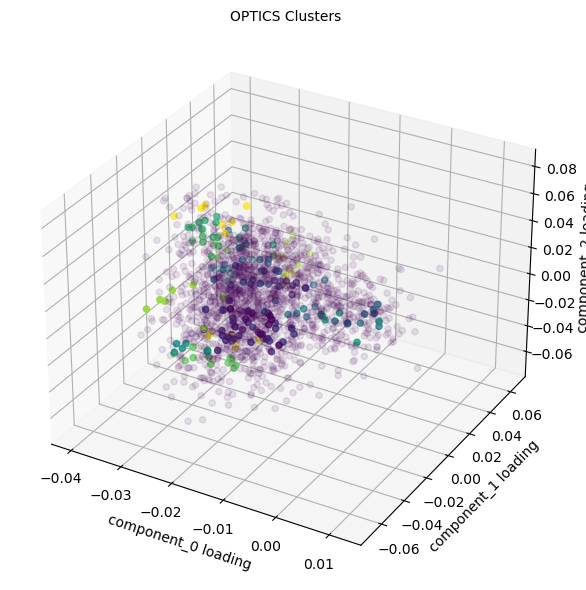

In [7]:
dpi=800
op.plot_clusters(n_dimensions=3)

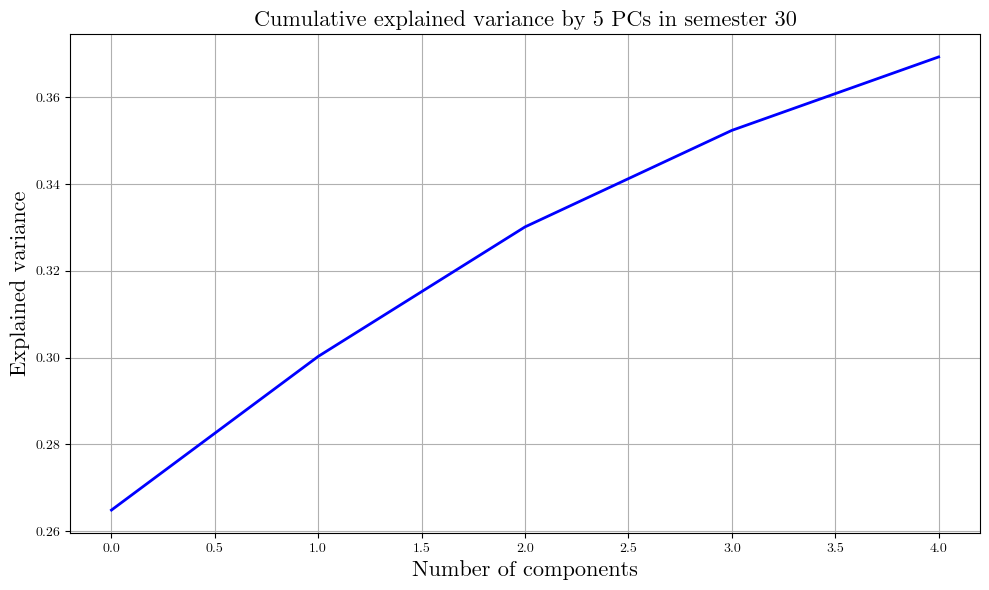

In [15]:
import numpy as np 
dpi = 800
im = op.plot_explained_variance()

C:\Users\rauup\AppData\Local\Temp\ipykernel_11836\1666331496.py:591: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('tsne.png', dpi=dpi, bbox_inches='tight')
C:\Users\rauup\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


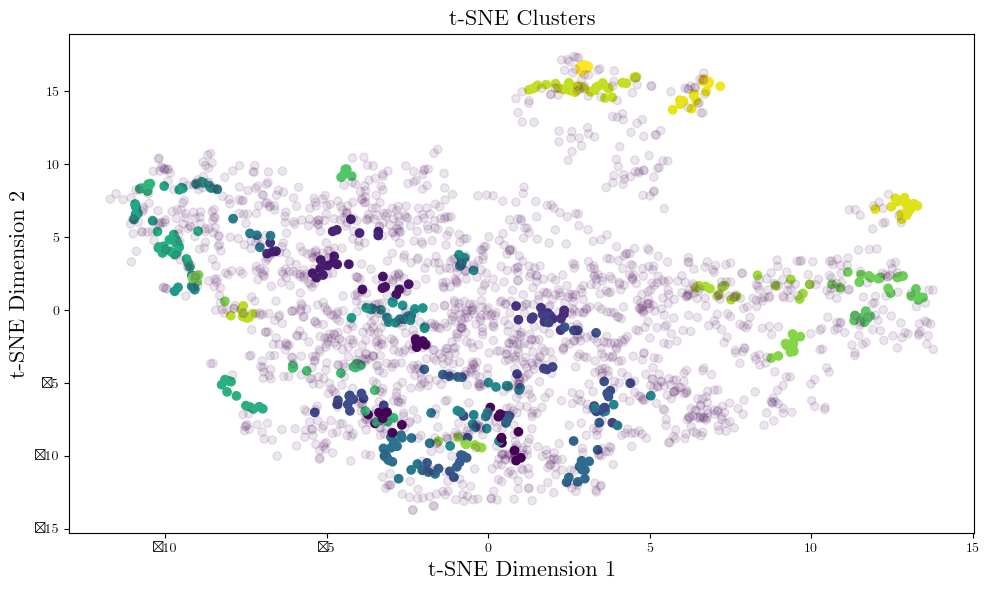

In [17]:
op.plot_clusters_tsne()
plt.show()

In [32]:
with open('optimal_pairs_by_semester.pkl', 'rb') as f:
    optimal_pairs_by_semester = pickle.load(f)

In [46]:
optimal_pairs_by_semester

{'Semester_1': array([('ATGE', 'JOE'), ('ATGE', 'STLD'), ('BCO', 'PKX'),
        ('EXPD', 'IBCP'), ('JOE', 'STLD'), ('MSA', 'WGO'), ('BC', 'MCS'),
        ('SBSI', 'UMBF'), ('ALL', 'GL'), ('DHR', 'EAT'), ('ARWR', 'KELYB'),
        ('AMZN', 'TSM'), ('ESLT', 'SAP'), ('ORAN', 'OSIS'),
        ('FITB', 'USB'), ('AEE', 'D'), ('D', 'FE'), ('D', 'PEG'),
        ('DVN', 'PDS')], dtype=object),
 'Semester_2': array([('AVNW', 'DOX'), ('AMD', 'LRCX'), ('LRCX', 'PHG'),
        ('LRCX', 'WOLF'), ('PHG', 'TSM'), ('TER', 'TXN'), ('ANIK', 'SNBR'),
        ('SNN', 'WULF'), ('HIFS', 'TSBK'), ('LAD', 'SXT'),
        ('ACNB', 'VLGEA'), ('ACHC', 'MCK'), ('MCK', 'ZEUS'),
        ('BMI', 'EHC'), ('BMI', 'TPC'), ('BMI', 'WRB'), ('BRT', 'FMS'),
        ('DHC', 'MCO'), ('LMT', 'RELL'), ('MCO', 'RELL'), ('BAK', 'WT'),
        ('OSUR', 'WT'), ('DIOD', 'IMMR'), ('EL', 'MLM'), ('MAN', 'MLM'),
        ('IPAR', 'LKFN'), ('MET', 'TFC'), ('MET', 'THG'), ('RDN', 'THG'),
        ('CMS', 'XEL'), ('D', 'ETR'), ('ETR', 'EXC

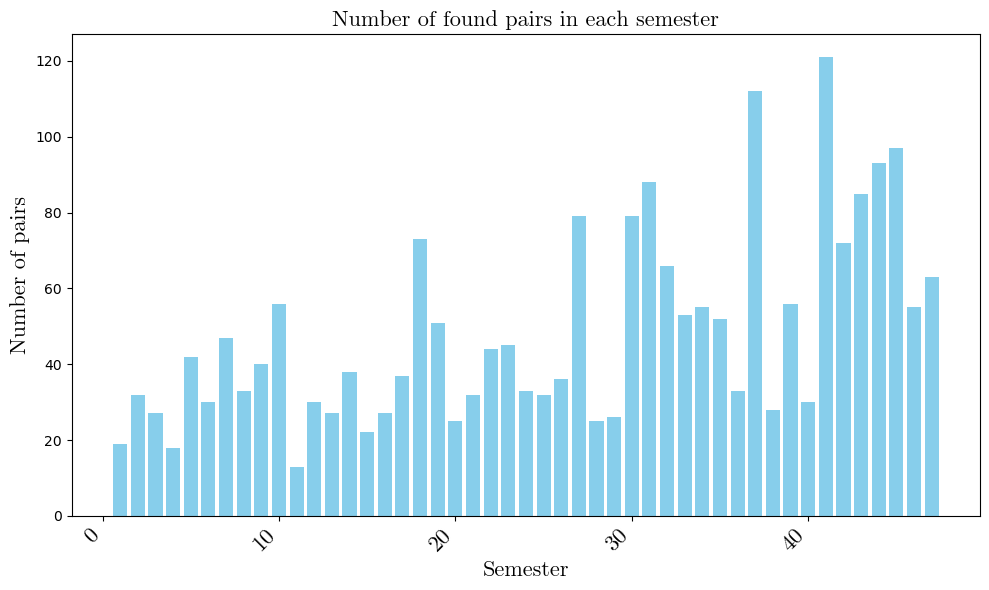

In [75]:
semester_labels = [int(semester.split('_')[1]) for semester in optimal_pairs_by_semester.keys()]
semester_lengths = [len(optimal_pairs_by_semester[semester]) for semester in optimal_pairs_by_semester.keys()]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(semester_labels, semester_lengths, color='skyblue')
plt.xlabel('Semester', fontproperties=custom_font, fontsize=16)
plt.ylabel('Number of pairs', fontproperties=custom_font, fontsize=16)
plt.title('Number of found pairs in each semester', fontproperties=custom_font, fontsize=16)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45, ha="right", fontproperties=custom_font, fontsize=16)

# Show or save the plot
plt.tight_layout()
plt.savefig('semester_lengths.png', dpi=800)
plt.show()

In [5]:
from matplotlib.font_manager import FontProperties
custom_font = FontProperties(fname=r'C:\Users\rauup\AppData\Local\Microsoft\Windows\Fonts\cmu.serif-roman.ttf')

In [50]:
import matplotlib.font_manager

# Get a list of available fonts on your system
available_fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Print the list of available fonts
for font in available_fonts:
    print(font)

C:\Windows\Fonts\ROCKI.TTF
C:\Windows\Fonts\GIGI.TTF
C:\Windows\Fonts\BOD_BI.TTF
C:\Windows\Fonts\symbol.ttf
C:\Windows\Fonts\GILB____.TTF
C:\Windows\Fonts\timesbd.ttf
C:\Windows\Fonts\mvboli.ttf
C:\Windows\Fonts\GOUDYSTO.TTF
C:\Windows\Fonts\ROCCB___.TTF
C:\Windows\Fonts\BOD_PSTC.TTF
C:\Windows\Fonts\tahomabd.ttf
C:\Windows\Fonts\BOD_BLAR.TTF
C:\Windows\Fonts\LBRITEDI.TTF
C:\Windows\Fonts\CascadiaCode.ttf
C:\Windows\Fonts\LBRITEI.TTF
C:\Windows\Fonts\CENSCBK.TTF
C:\Windows\Fonts\BOD_CBI.TTF
C:\Windows\Fonts\ERASDEMI.TTF
C:\Windows\Fonts\FRSCRIPT.TTF
C:\Windows\Fonts\corbeli.ttf
C:\Windows\Fonts\trebucbd.ttf
C:\Windows\Fonts\JOKERMAN.TTF
C:\Windows\Fonts\BELL.TTF
C:\Windows\Fonts\georgia.ttf
C:\Windows\Fonts\GILSANUB.TTF
C:\Windows\Fonts\trebucbi.ttf
C:\Windows\Fonts\LFAXDI.TTF
C:\Windows\Fonts\BOD_CB.TTF
C:\Windows\Fonts\cambria.ttc
C:\Windows\Fonts\pala.ttf
C:\Windows\Fonts\COPRGTB.TTF
C:\Windows\Fonts\msjhl.ttc
C:\Windows\Fonts\BOOKOSBI.TTF
C:\Windows\Fonts\phagspa.ttf
C:\Windows\Fo

In [19]:
import math

n = 2435
k = 2

combinations = math.comb(n, k)
print("Number of pairs combinations:", combinations)

Number of pairs combinations: 2963395


In [4]:
optimal_pairs = op.filtered_pairs['pair'].values
beta_values = op.filtered_pairs['beta'].values

In [100]:
beta_values[1]

0.2833292276066888

In [18]:
open_bysemester['Semester_30'].columns

Index(['A', 'AA', 'AAL', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AB', 'ABBV',
       ...
       'ZBRA', 'ZD', 'ZEUS', 'ZG', 'ZION', 'ZTEK', 'ZTS', 'ZUMZ', 'ZWS',
       'ZYXI'],
      dtype='object', length=2435)

In [26]:
def calc_updated_norm_spread(pair, open_data):
    security_0 = pair[0]
    security_1 = pair[1]
    x = sm.add_constant(np.asarray(open_data[security_0]))
    y = np.asarray(open_data[security_1])
    model = sm.OLS(y, x)
    result = model.fit()

    beta = result.params[1]  # Only return the beta value
    return beta

open_data = open_bysemester['Semester_1']
betas = []
for pair in optimal_pairs:
    beta = calc_updated_norm_spread(pair, open_data)
    betas.append(beta)
# when the i element in beta_values is not in betas we flip the order of that i element in optimal_pairs.
for i in range(len(beta_values)):
    if beta_values[i] != betas[i]:
        # Reverse the order of the i-th tuple
        modified_tuple = (optimal_pairs[i][1], optimal_pairs[i][0])
        optimal_pairs[i] = modified_tuple

optimal_pairs

array([('MTH', 'SID'), ('DAR', 'ODFL'), ('PGC', 'DAR'), ('LFCR', 'PGC'),
       ('CSR', 'BCS'), ('CSR', 'EGBN'), ('MSA', 'WGO'), ('MCS', 'BC'),
       ('SBSI', 'UMBF'), ('GL', 'ALL'), ('STZ', 'MKL'), ('EAT', 'DHR'),
       ('CLS', 'QGEN'), ('CSGS', 'RAMP'), ('TSM', 'AMZN'),
       ('ESLT', 'SAP'), ('ORAN', 'OSIS'), ('FITB', 'USB'), ('D', 'AEE'),
       ('DUK', 'AEE'), ('XEL', 'AEE'), ('ALE', 'CNP'), ('D', 'DUK'),
       ('D', 'FE'), ('D', 'PEG'), ('D', 'PNW'), ('PPL', 'D'),
       ('DUK', 'FE'), ('PPL', 'PEG')], dtype=object)

In [3]:
%%writefile optics_pairs.py
# Define your OpticsPairs class here
class OpticsPairs:
    # Your class methods and attributes

Overwriting optics_pairs.py


In [34]:
def calc_updated_norm_spread(pair, open_data):
    security_0 = pair[0]
    security_1 = pair[1]

    x = sm.add_constant(np.asarray(open_data[security_0]))
    y = np.asarray(open_data[security_1])

    # Get parameters and calculate spread
    model = sm.OLS(y, x)
    result = model.fit()

    alpha, beta = result.params[0], result.params[1]

    spread = y - (alpha + beta*x.T[1])
    norm_spread = OpticsPairs.calc_zscore(spread)

    return pd.Series(norm_spread, name=pair)

open_data = open_bysemester['Semester_2'] 
norm_spread_dict = {}

for pair in optimal_pairs:
    norm_spread = calc_updated_norm_spread(pair, open_data)
    norm_spread_dict[pair] = norm_spread

# Create a DataFrame from the dictionary
norm_spread_df = pd.DataFrame(norm_spread_dict)

# Ensure the DataFrame's index matches the close_data index
norm_spread_df.index = open_data.index

print(norm_spread_df)

                 MTH       DAR       PGC      LFCR       CSR            \
                 SID      ODFL       DAR       PGC       BCS      EGBN   
Date                                                                     
2000-07-03 -0.844624  0.465176  0.398924 -0.788862 -0.754118 -0.730591   
2000-07-05  0.462869 -0.502925  0.398924 -0.788862 -1.183088 -0.078380   
2000-07-06  0.312005 -0.744950  0.398924 -0.788862 -1.675852 -0.078380   
2000-07-07  0.424729 -0.710731  0.958902 -0.906491 -1.547604 -0.153533   
2000-07-10  0.418652 -0.952756  0.958902 -0.553604 -1.325722 -0.053328   
...              ...       ...       ...       ...       ...       ...   
2000-12-22  0.331327 -0.708233 -0.551949 -0.161164  1.868118  0.222669   
2000-12-26  1.220189 -0.483318 -0.831938 -0.102349  2.129216  0.210143   
2000-12-27  1.590666 -0.466209 -0.551949 -0.102349  1.861789  0.160041   
2000-12-28  1.651438 -0.466209 -0.551949  0.074094  2.146397  0.235194   
2000-12-29  1.697314 -0.725343 -0.8319

In [28]:
combined_dict = {}

for pair in optimal_pairs:
    security_0, security_1 = pair
    norm_spread_array = norm_spread_dict[pair]  # Extract the norm spread array
    
    # Extract open and close price series for both securities
    open_price_series_0 = open_bysemester['Semester_1'][security_0]
 #   close_price_series_0 = close_data_by_year[2000][security_0]
    
    open_price_series_1 = open_bysemester['Semester_1'][security_1]
  #  close_price_series_1 = close_data_by_year[2000][security_1]
    
    # Combine arrays while conserving the index
    combined_array = np.column_stack((
        norm_spread_array,
        open_price_series_0,
    #    close_price_series_0,
        open_price_series_1,
   #     close_price_series_1
    ))
    
    # Create a DataFrame with the combined array and set the index
    combined_df = pd.DataFrame(
        combined_array,
        index=open_price_series_0.index,
        columns=[
            'Norm Spread',
            f'open0', 
            # f'close0',
            f'open1', 
            # f'close1'
        ]
    )
    
    # Store the DataFrame in the combined_dict
    combined_dict[pair] = combined_df

In [14]:
type(combined_dict[optimal_pairs[18]])

pandas.core.frame.DataFrame

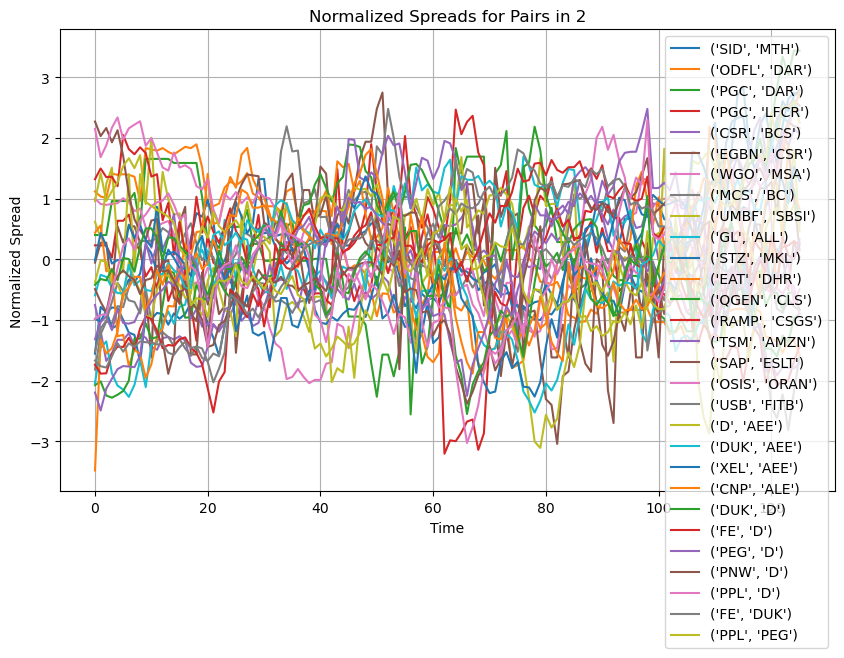

In [91]:
import matplotlib.pyplot as plt
Semester = 2

plt.figure(figsize=(10, 6))
for pair, norm_spread in norm_spread_dict.items():
    plt.plot(norm_spread, label=pair)

plt.title(f'Normalized Spreads for Pairs in {Semester}')
plt.xlabel('Time')
plt.ylabel('Normalized Spread')
plt.legend()
plt.grid(True)
plt.show()

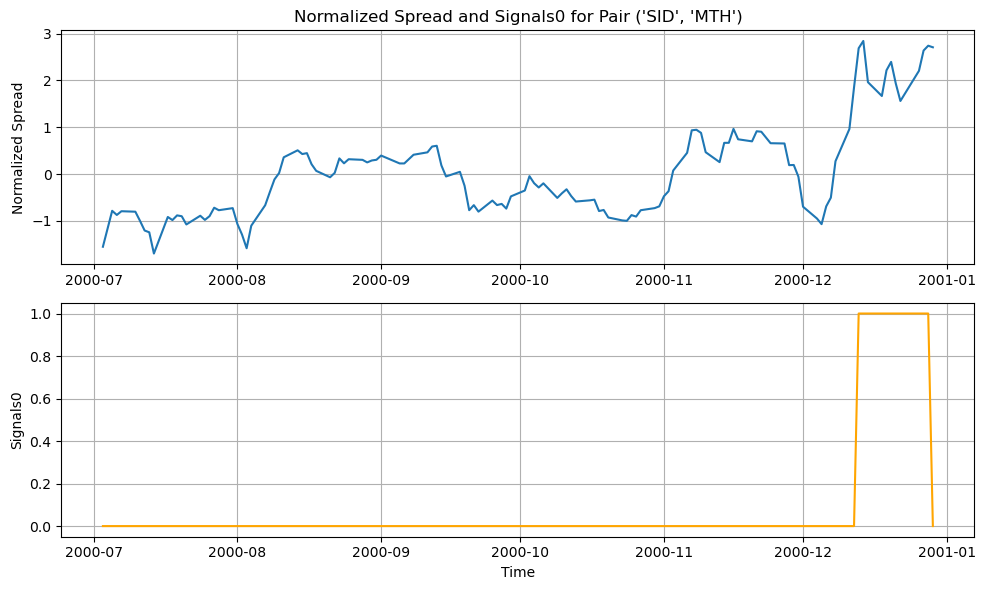

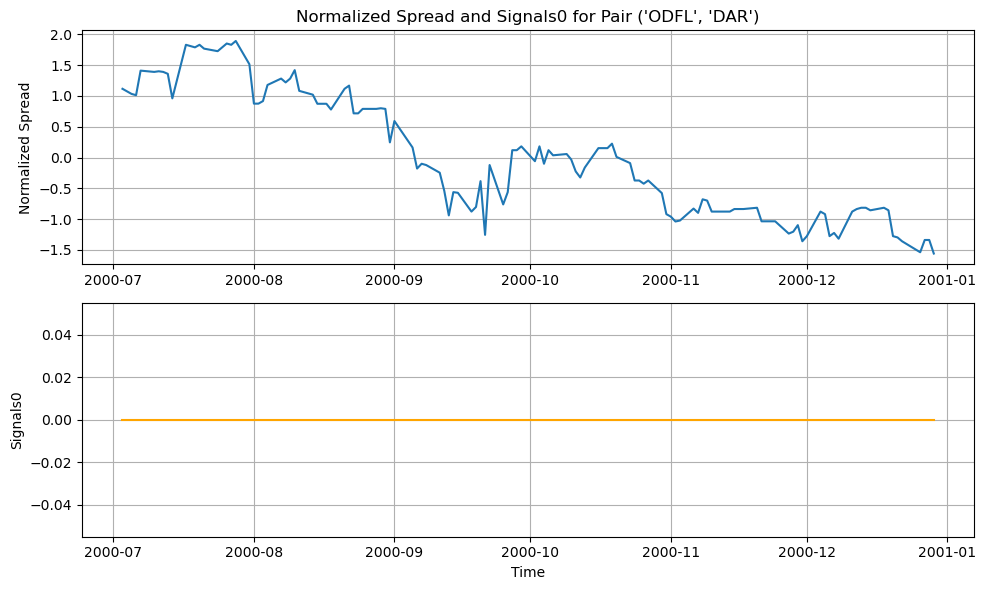

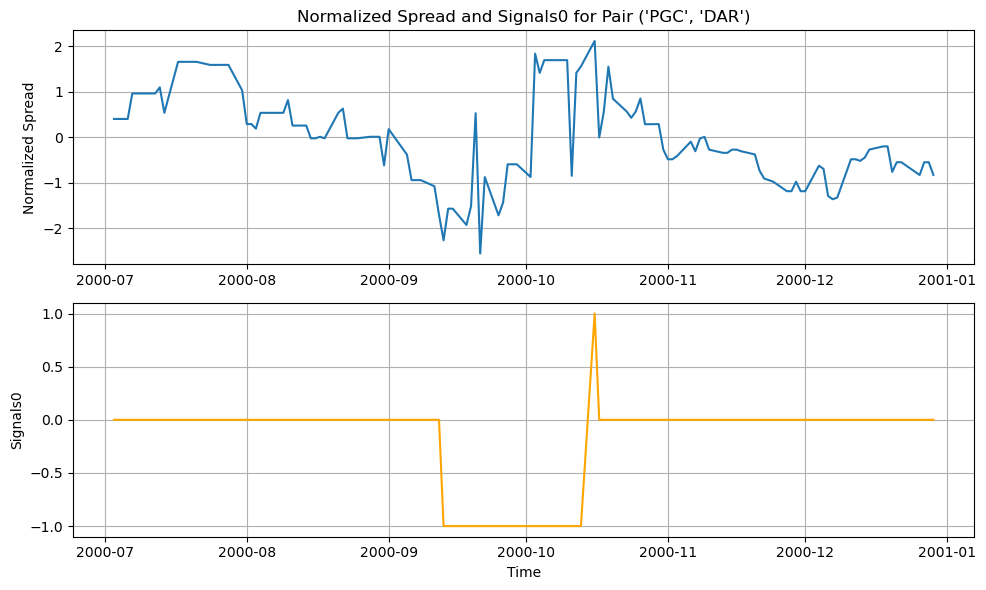

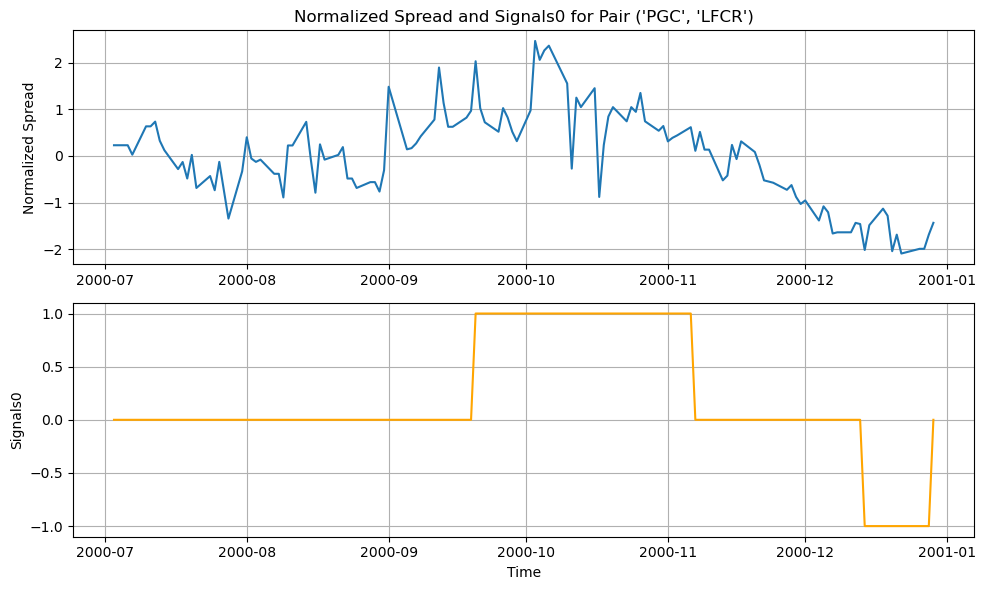

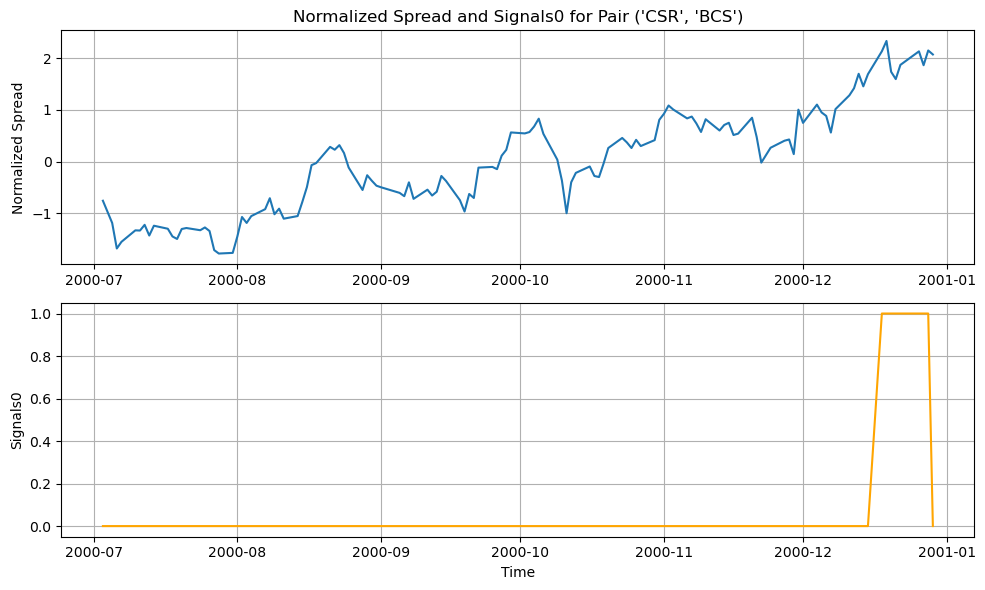

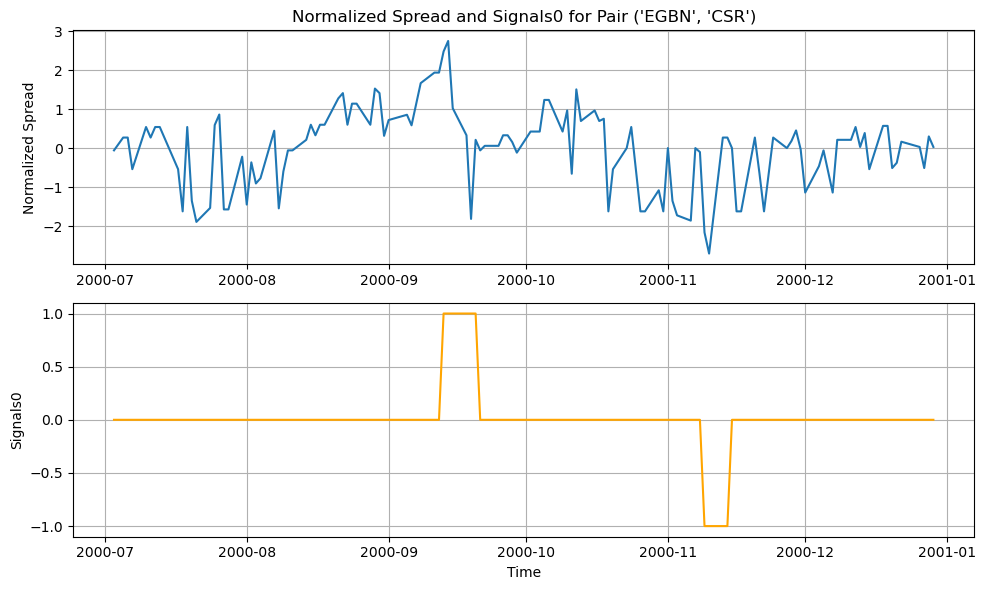

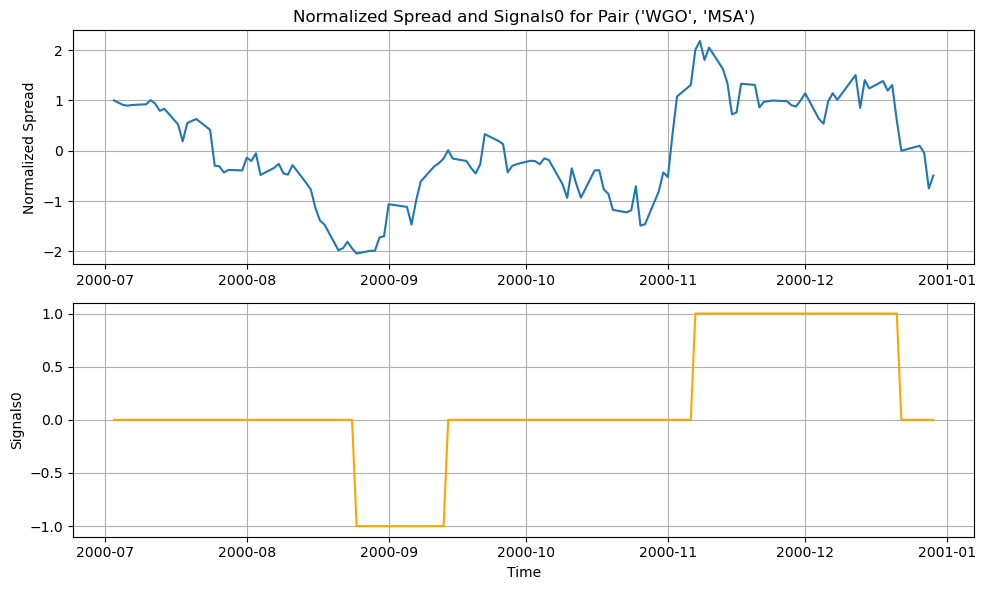

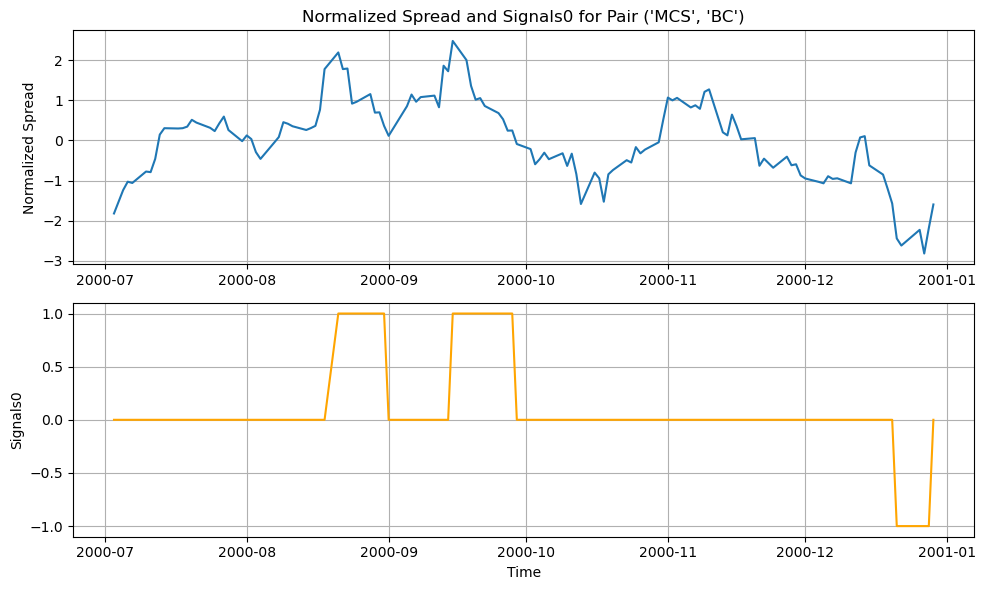

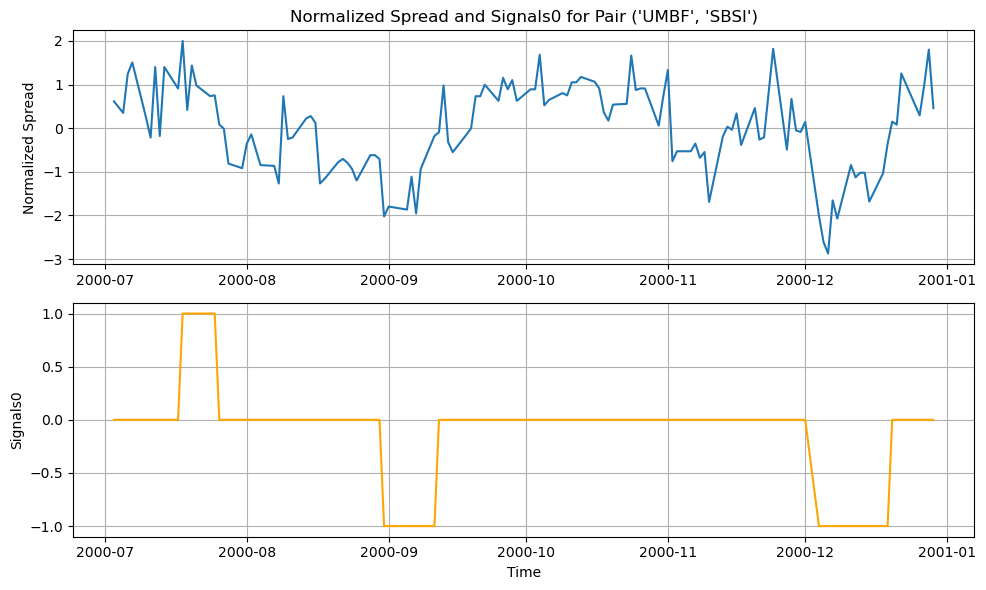

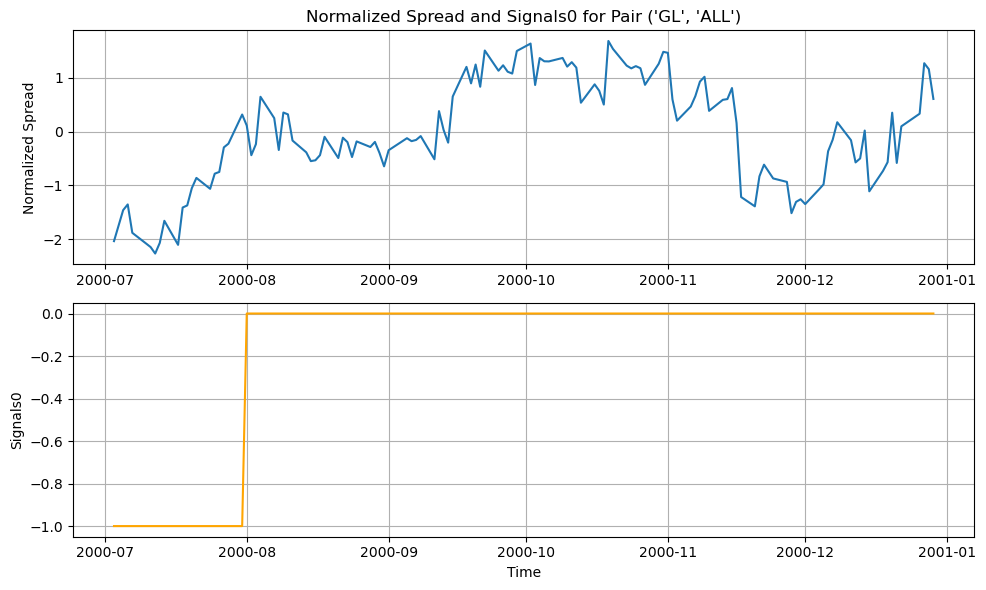

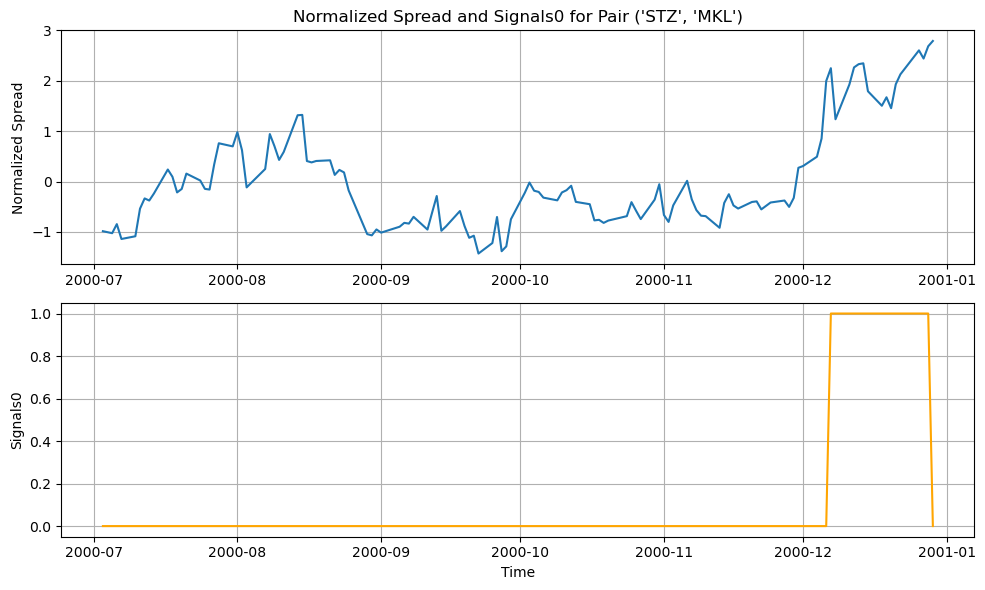

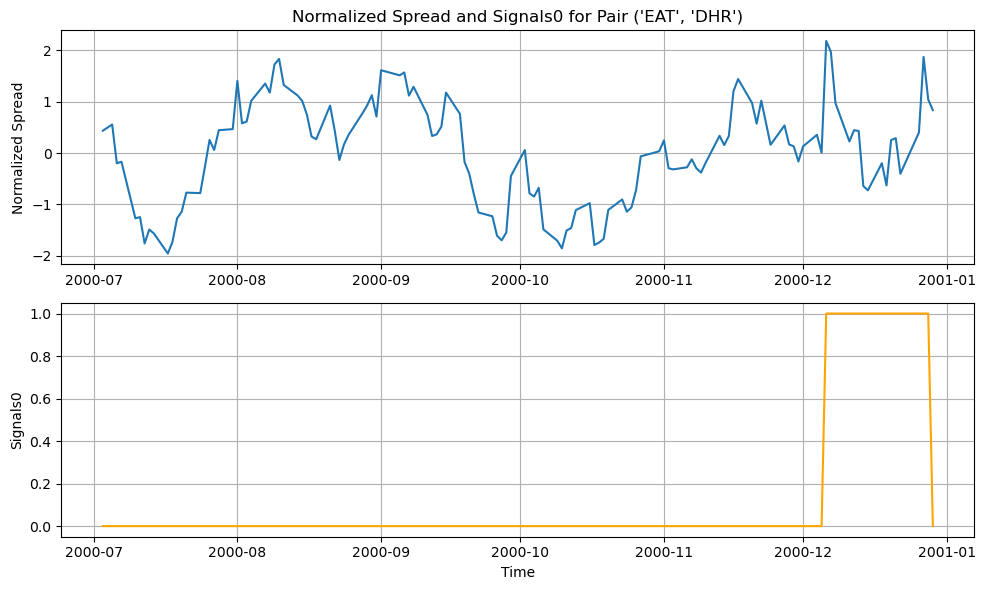

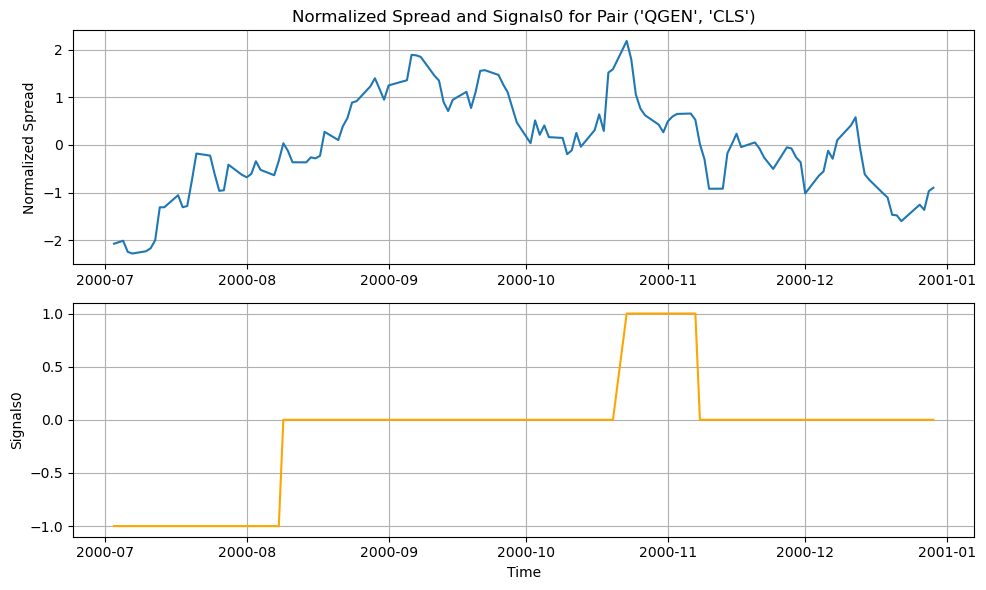

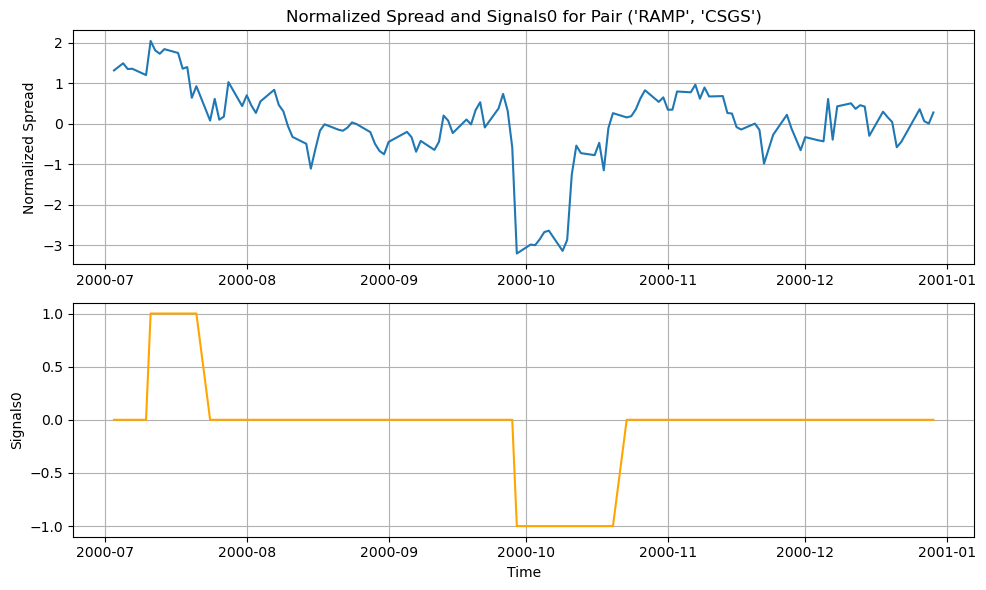

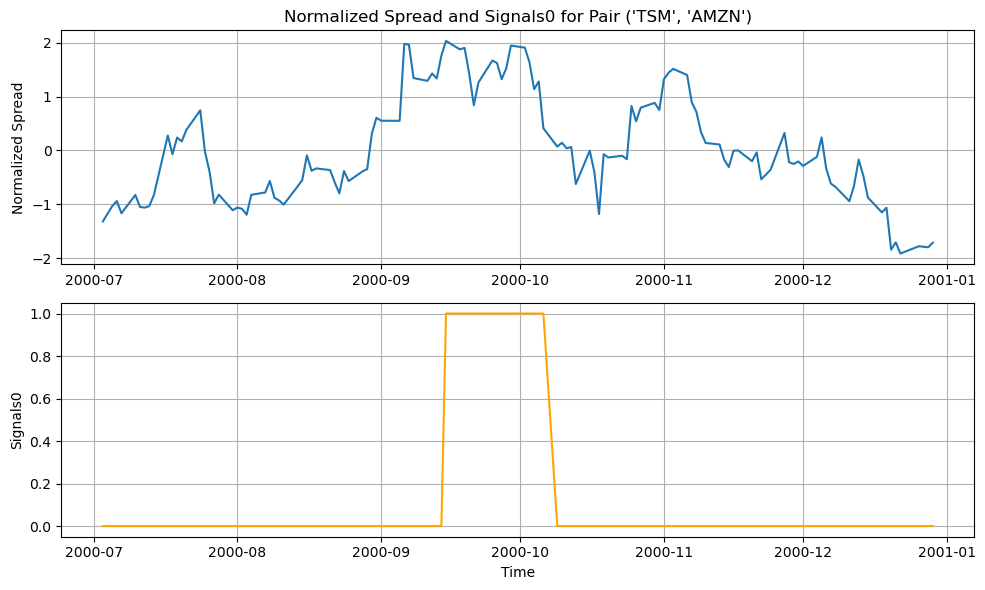

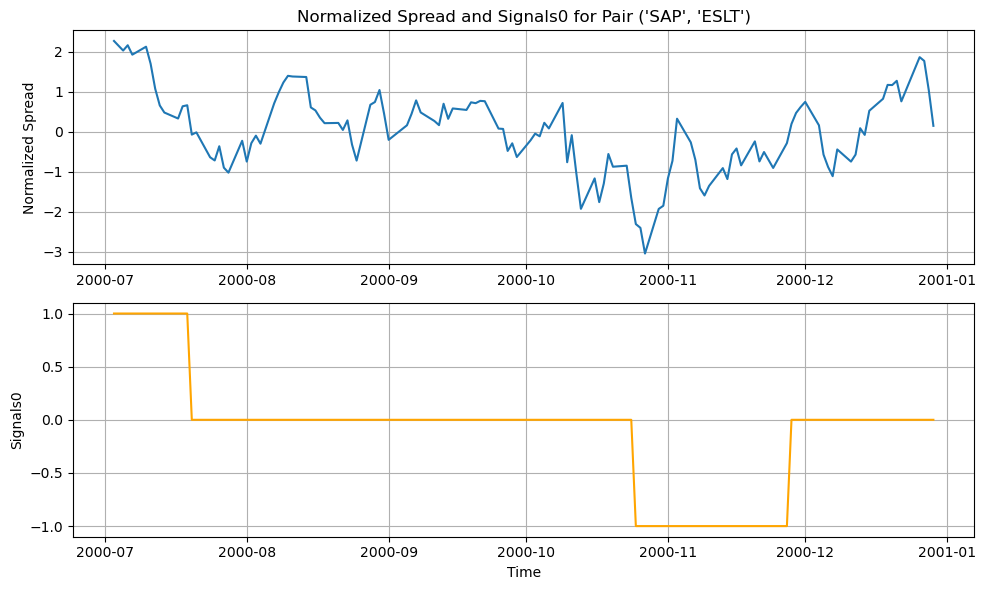

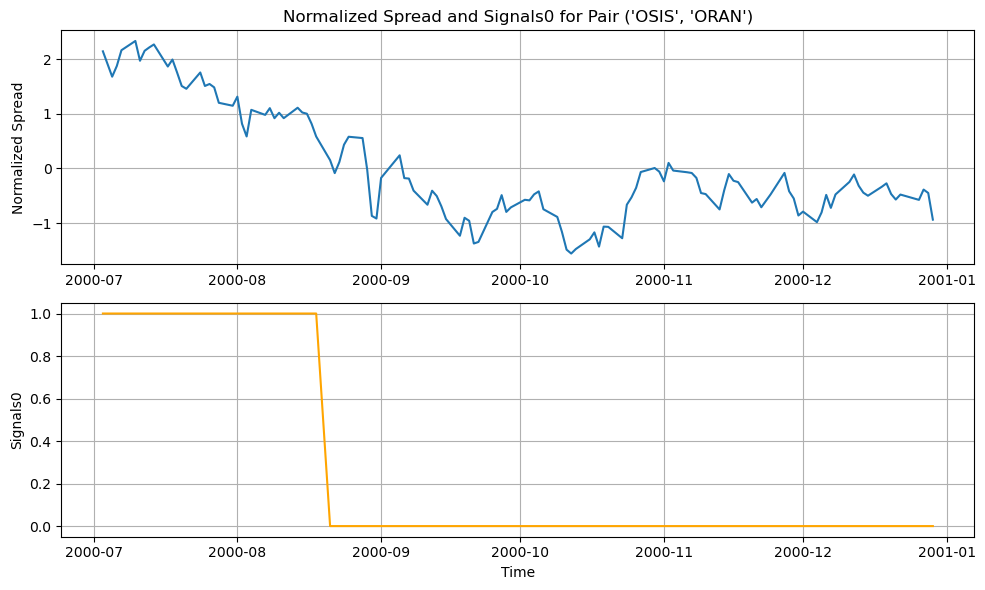

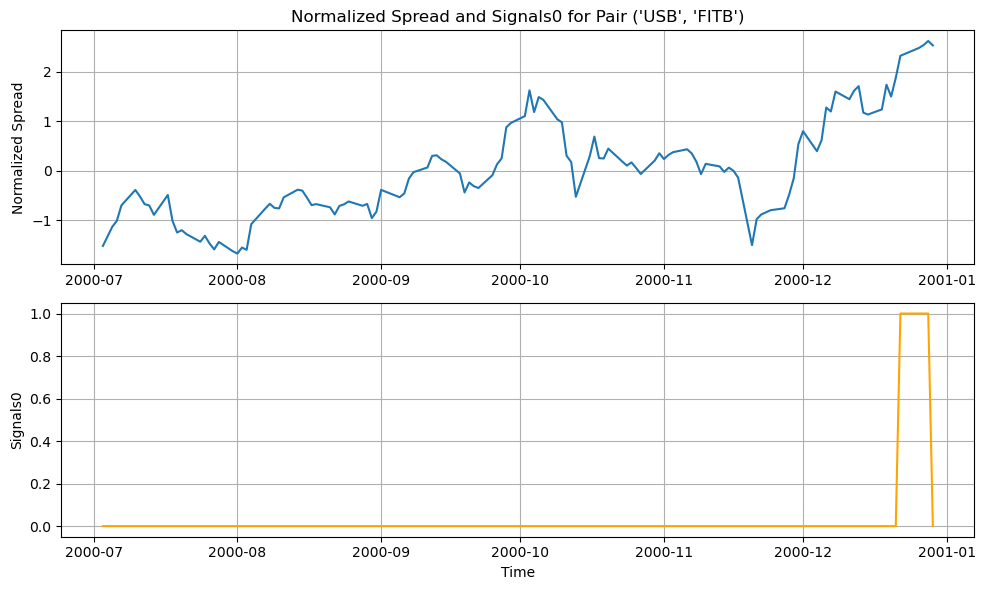

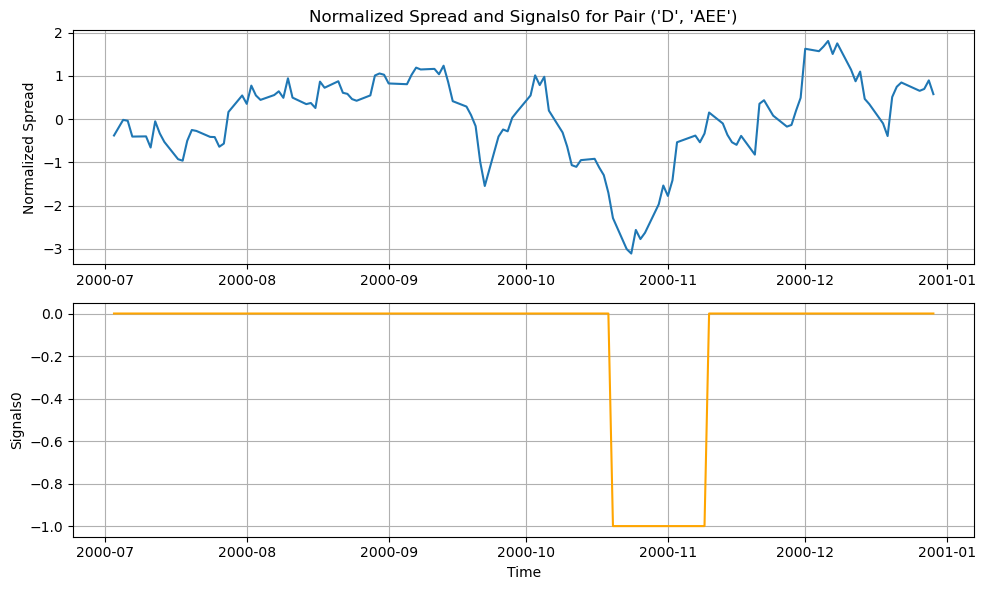

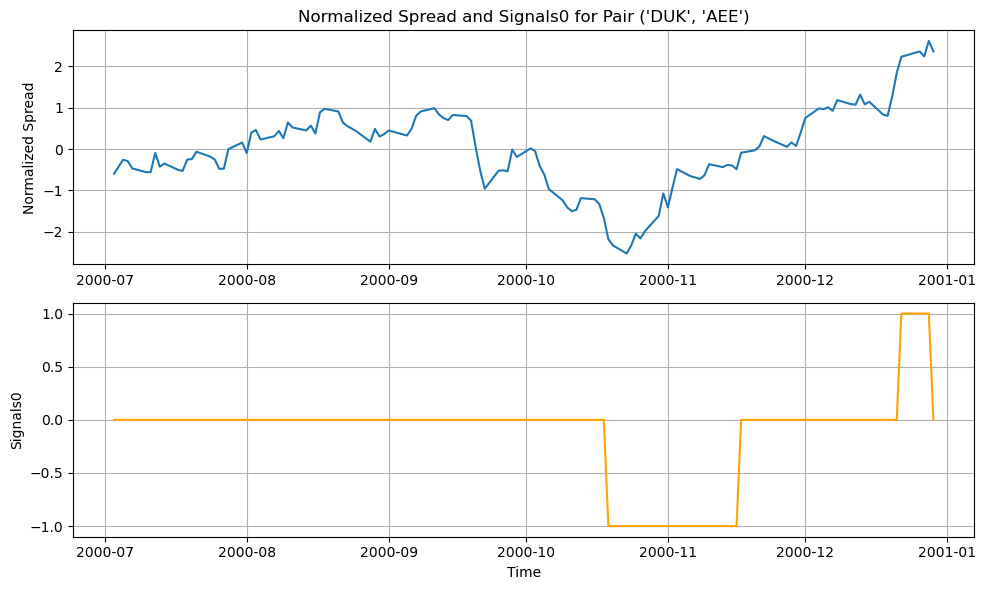

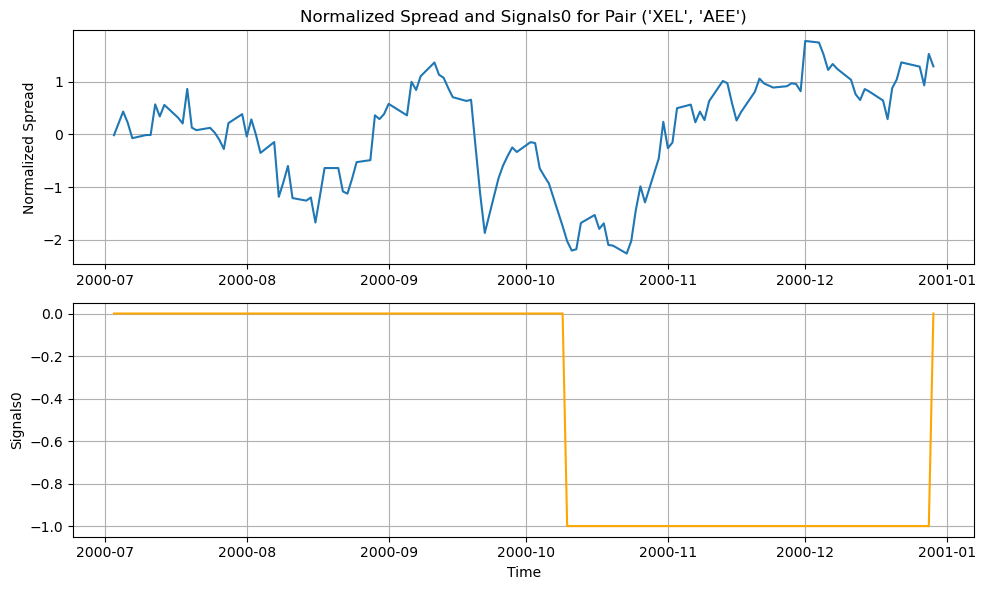

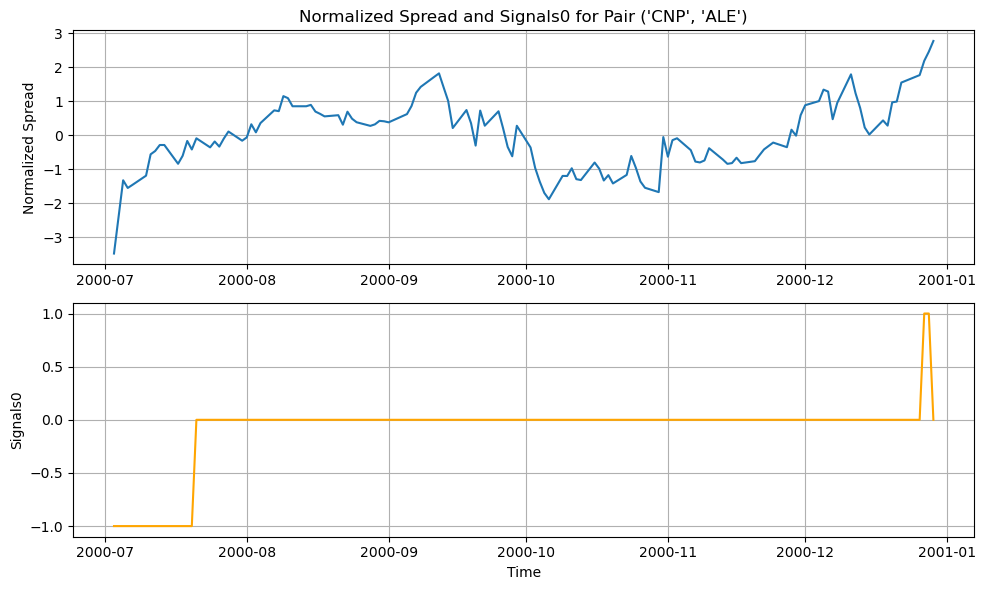

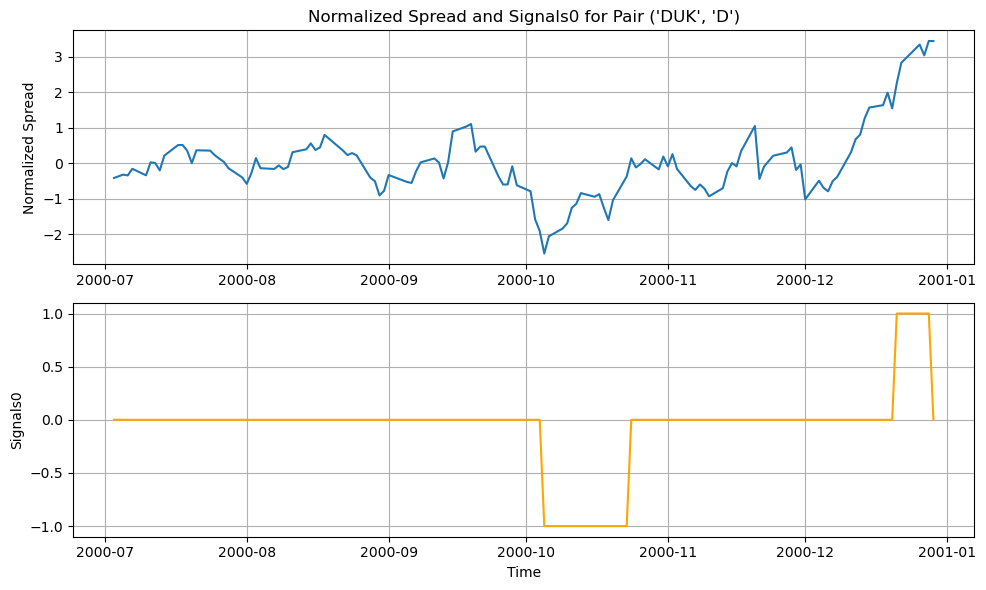

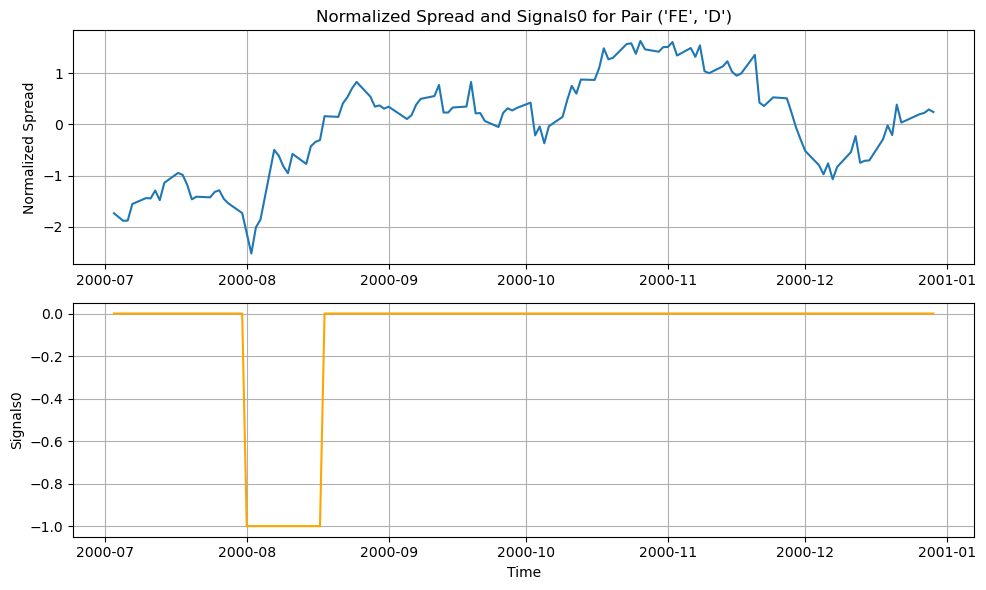

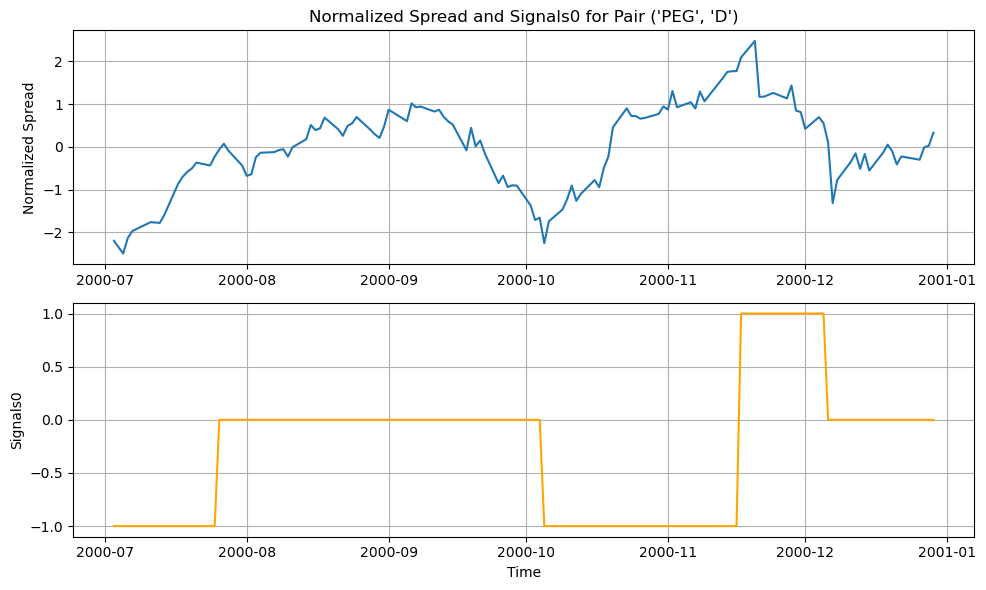

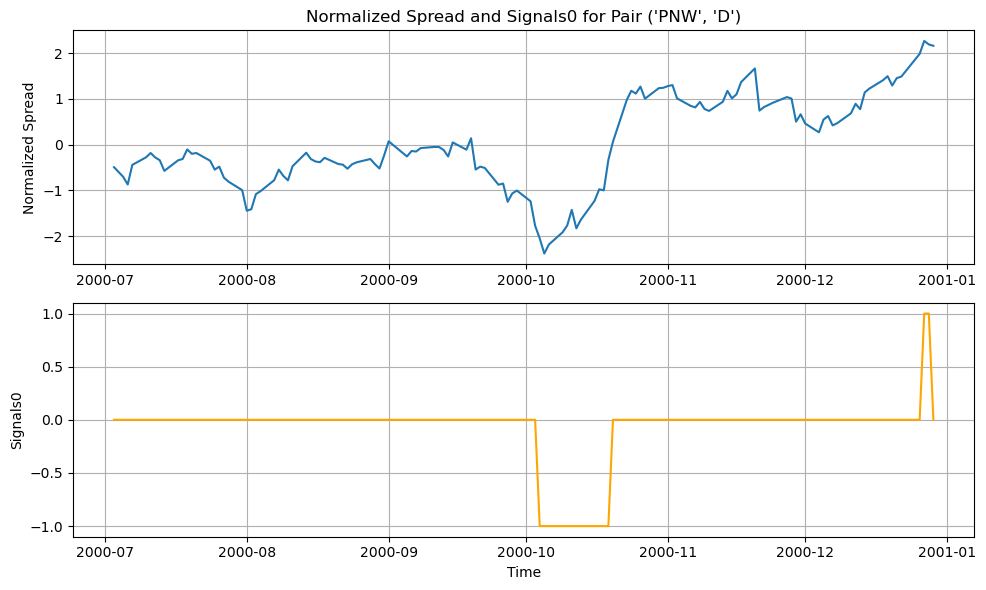

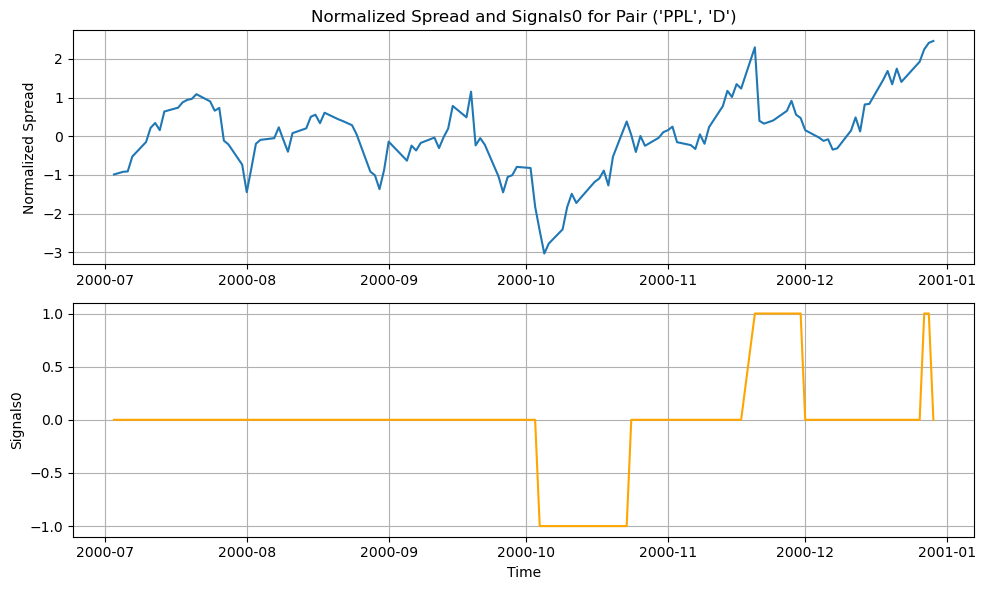

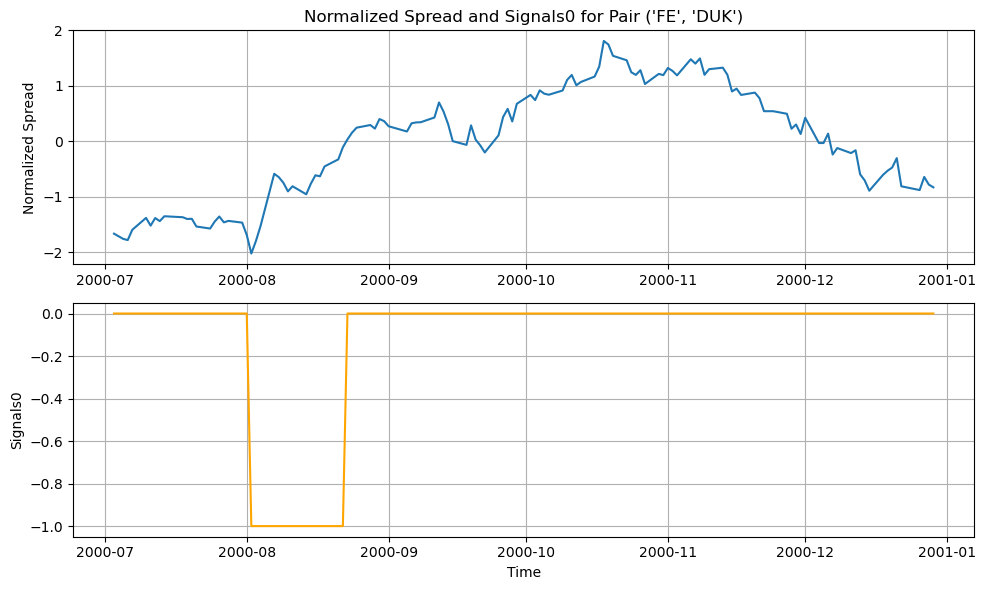

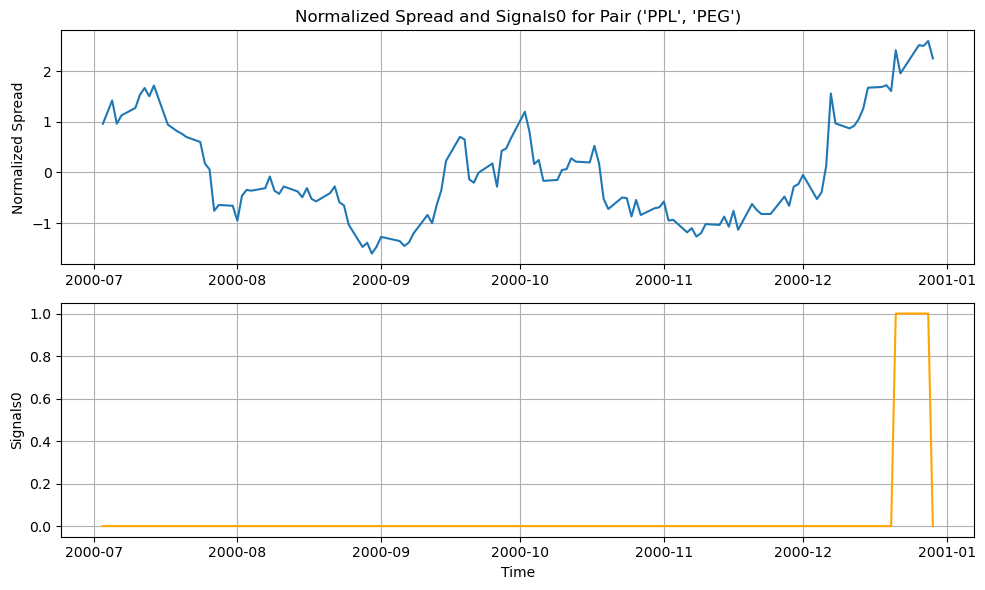

In [115]:
import matplotlib.pyplot as plt

# Iterate through each pair and its DataFrame
for pair, df in combined_dict.items():
    plt.figure(figsize=(10, 6))
    
    # Plot Norm Spread
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Norm Spread'], label='Norm Spread')
    plt.title(f'Normalized Spread and Signals0 for Pair {pair}')
    plt.ylabel('Normalized Spread')
    plt.grid(True)
    
    # Plot Signals0
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['signals0'], label='Signals0', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Signals0')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [116]:
pd.set_option('display.max_rows', 150) 
combined_dict[optimal_pairs[12]]

,Norm Spread,open0,open1,signals0,signals1,pos0,pos1,openlog0ret,openlog1ret,pos_diff,portlogret,cumportlogval,cumportval
Date,,,,,,,,,,,,,
2000-07-03,-2.075418,47.817047,49.6875,-1.0,1.0,-2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-05,-2.013204,48.856548,50.7500,-1.0,1.0,-2.0,2.0,0.021506,0.021158,0.0,-0.000696,-0.000696,0.999304
2000-07-06,-2.246229,49.392544,48.9375,-1.0,1.0,-2.0,2.0,0.010911,-0.036368,0.0,-0.094557,-0.095253,0.909143
2000-07-07,-2.281638,50.675674,49.2500,-1.0,1.0,-2.0,2.0,0.025647,0.006365,0.0,-0.038562,-0.133816,0.874751
2000-07-10,-2.233123,53.241943,50.9375,-1.0,1.0,-2.0,2.0,0.049400,0.033690,0.0,-0.031421,-0.165237,0.847693
2000-07-11,-2.171540,52.121231,50.9375,-1.0,1.0,-2.0,2.0,-0.021274,0.000000,0.0,0.042548,-0.122688,0.884539
2000-07-12,-2.001572,51.455299,52.1250,-1.0,1.0,-2.0,2.0,-0.012859,0.023045,0.0,0.071808,-0.050880,0.950393
2000-07-13,-1.311372,50.903069,58.0000,-1.0,1.0,-2.0,2.0,-0.010790,0.106798,0.0,0.235177,0.184297,1.202373
2000-07-14,-1.308906,53.924114,59.5000,-1.0,1.0,-2.0,2.0,0.057655,0.025533,0.0,-0.064243,0.120055,1.127559
